In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Telco-Customer-Churn-classification.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.sample(5)  #quick dataset overview

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2912,0674-DGMAQ,Male,1,Yes,No,32,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,93.50,2970.8,No
5380,9689-PTNPG,Male,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,80.25,144.55,Yes
2438,7089-IVVAZ,Female,0,No,No,8,Yes,Yes,Fiber optic,Yes,...,No,Yes,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.35,847.3,Yes
5309,0704-VCUMB,Female,0,Yes,No,61,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),20.25,1278.8,No
1450,1735-XMJVH,Male,0,Yes,Yes,8,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.35,152.6,No


In [4]:
## data understanding

df.shape

(7043, 21)

In [5]:
df.info(verbose=True)  #Check columns names and dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()  #Check for missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.describe()  #statistical summary

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
df.duplicated().sum()   #checking duplicate values

0

In [9]:
# Step 1: Drop 'customerID'
df.drop(columns=['customerID'], inplace=True)

In [10]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [11]:
# Step 2: Convert 'TotalCharges' to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [12]:
# Step 3: Handle missing values created during conversion
missing_total_charges = df['TotalCharges'].isna().sum()
print(missing_total_charges)
df.dropna(subset=['TotalCharges'], inplace=True)


11


In [13]:
# Step 4: Reset index after dropping rows
df.reset_index(drop=True, inplace=True)

In [14]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [15]:
# Step 5: Standardize formatting of categorical features
df = df.apply(lambda col: col.str.strip() if col.dtype == 'object' else col)


In [16]:
# Step 6: Check for outliers using IQR method for numeric features
def find_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

outliers_monthly = find_outliers_iqr(df, 'MonthlyCharges')
outliers_total = find_outliers_iqr(df, 'TotalCharges')
outliers_tenure = find_outliers_iqr(df, 'tenure')

In [17]:
# Show count of outliers found
len(outliers_monthly), len(outliers_total), len(outliers_tenure), missing_total_charges

(0, 0, 0, 11)

In [18]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7028,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7029,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7030,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [19]:
# convert 'SeniorCitizen' to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].map({1:'Yes', 0:'No'})

In [20]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   object 
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [114]:

# group tenure into bins of 12 months and assign labels to these groups
labels = [f"{i} - {i+11}" for i in range(1, 72, 12)]

df['tenure_group'] = pd.cut(df['tenure'], range(1, 80, 12), right=False, labels=labels)
df['tenure_group'].value_counts()


tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

In [116]:
##  to perform Exploratory Data Analysis (EDA)

In [117]:
## step 1 univariate analysis

In [118]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

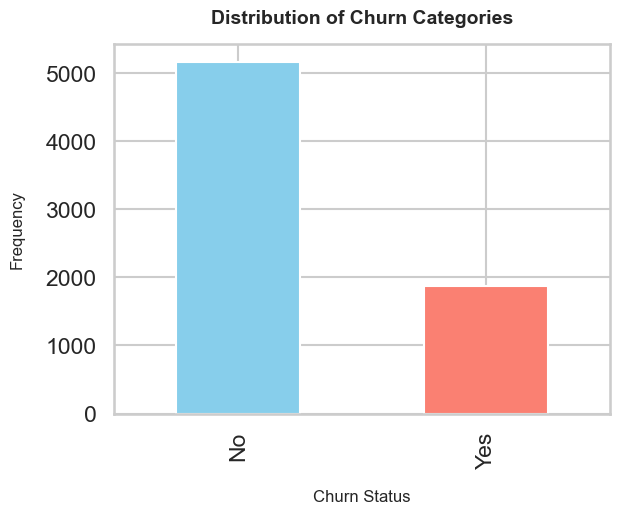

In [119]:
# visulaizing the distribution of churn variable
df['Churn'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel('Frequency', fontsize=12, labelpad=15)
plt.xlabel('Churn Status', fontsize=12, labelpad=15)
plt.title('Distribution of Churn Categories', fontsize=14, fontweight='bold', pad=15)
plt.show()

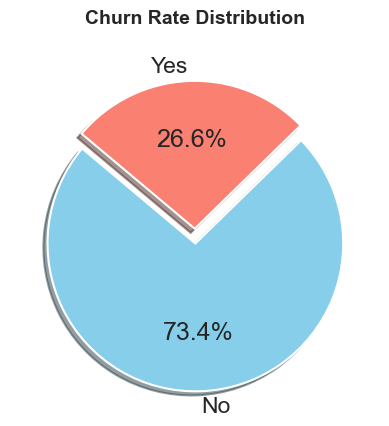

In [120]:
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140 ,explode=(0.1,0), shadow=True, colors=['skyblue', 'salmon'])
plt.ylabel("")
plt.title("Churn Rate Distribution", fontsize=14, fontweight='bold', pad=15)
plt.show()


In [121]:
## to remove warnings

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

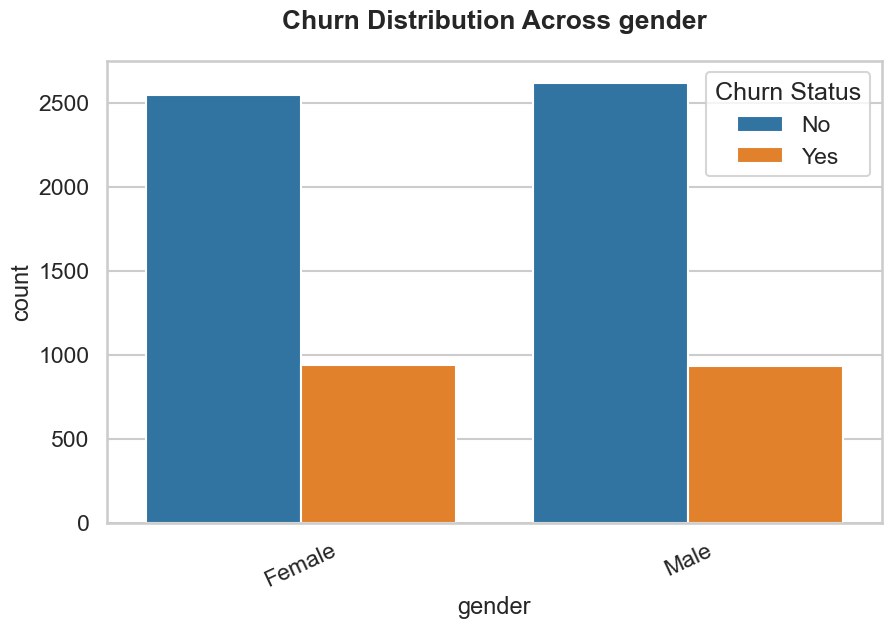

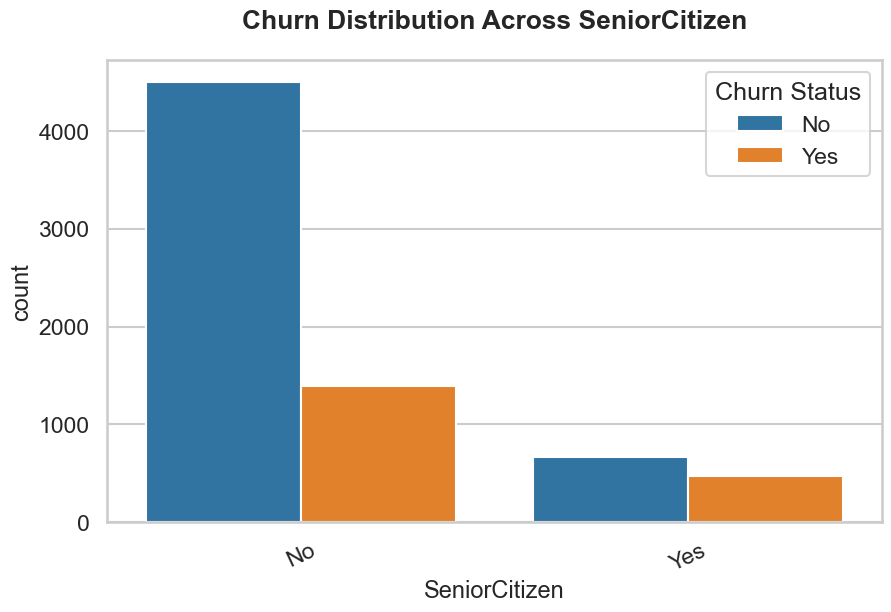

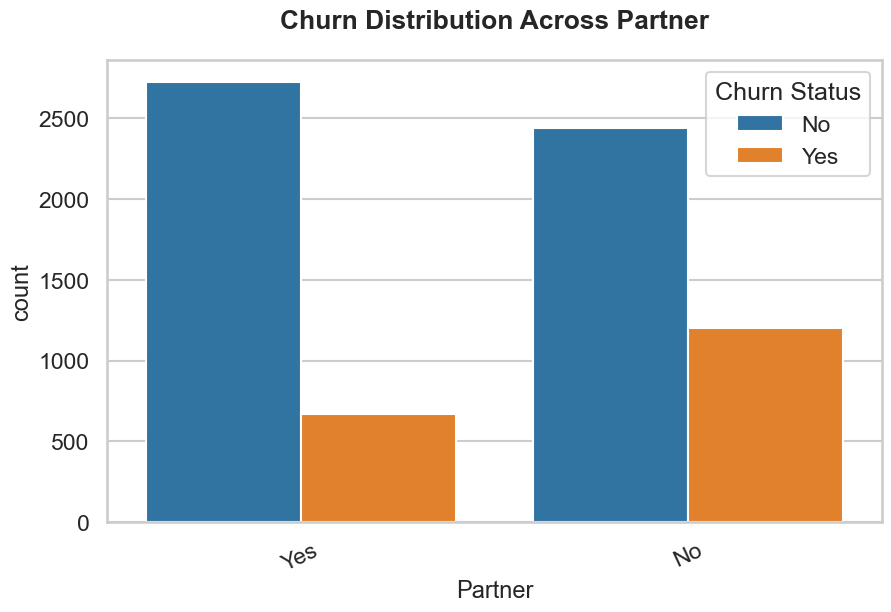

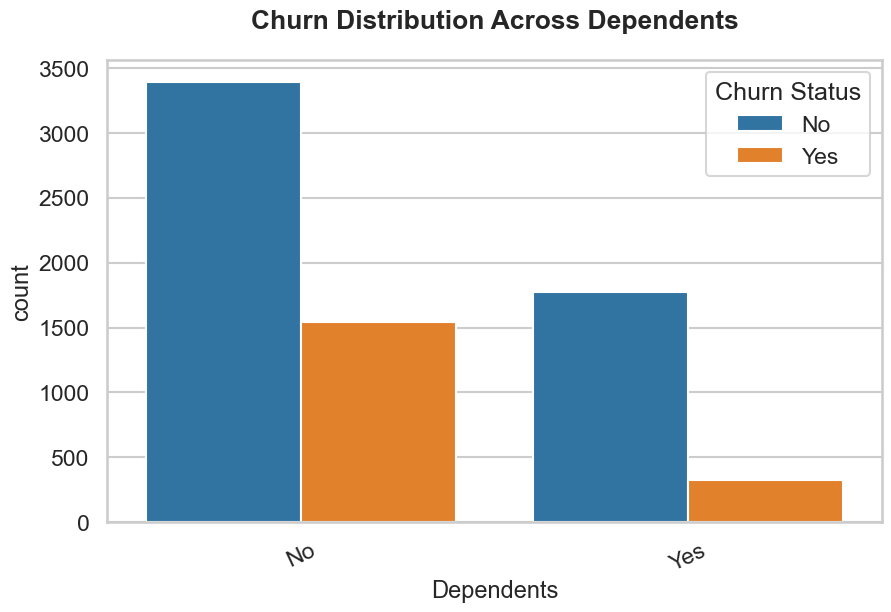

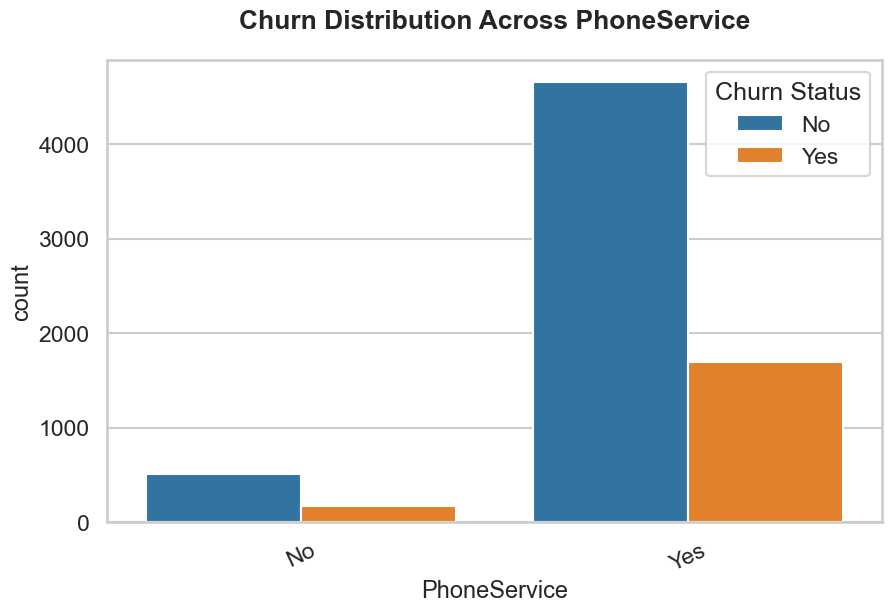

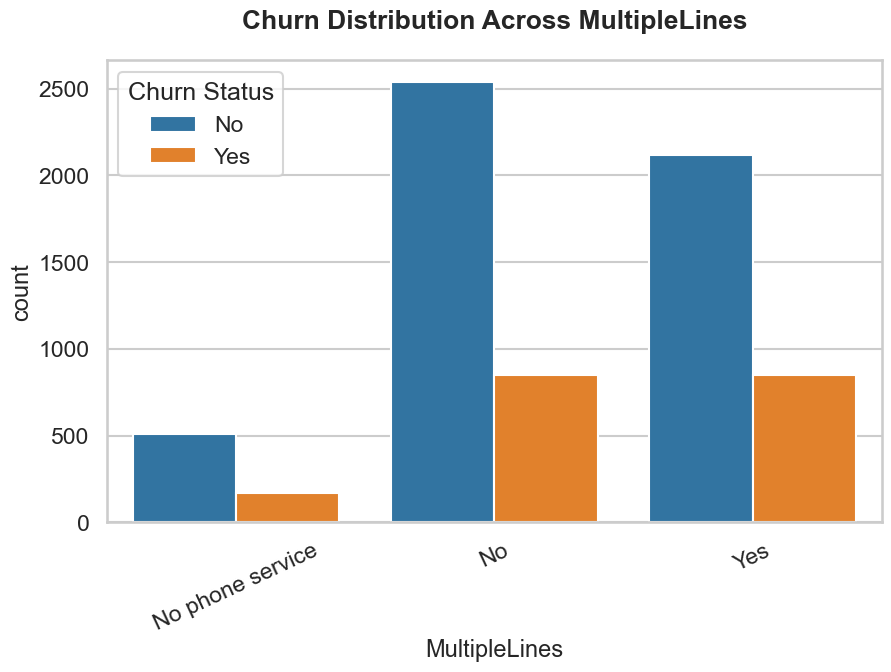

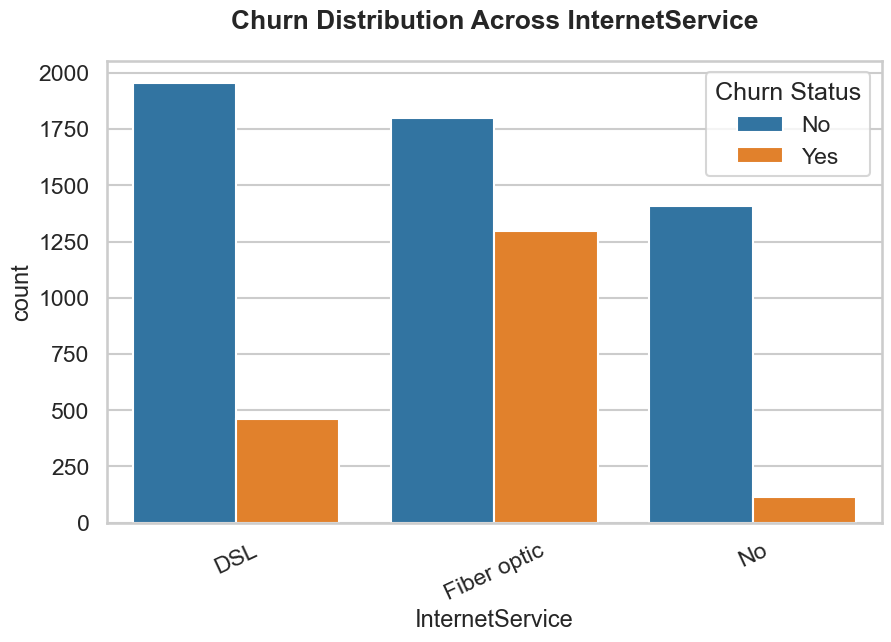

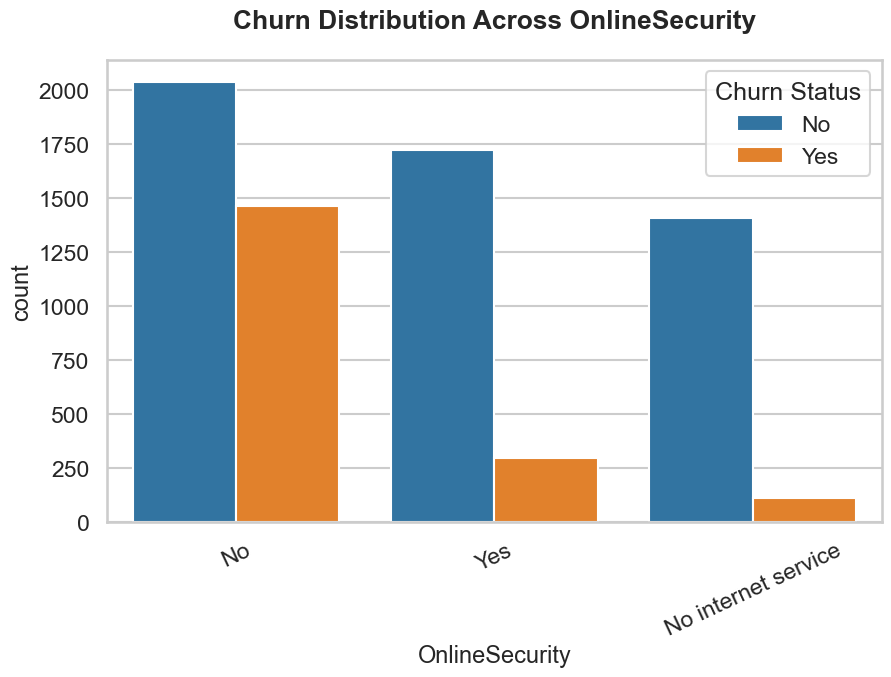

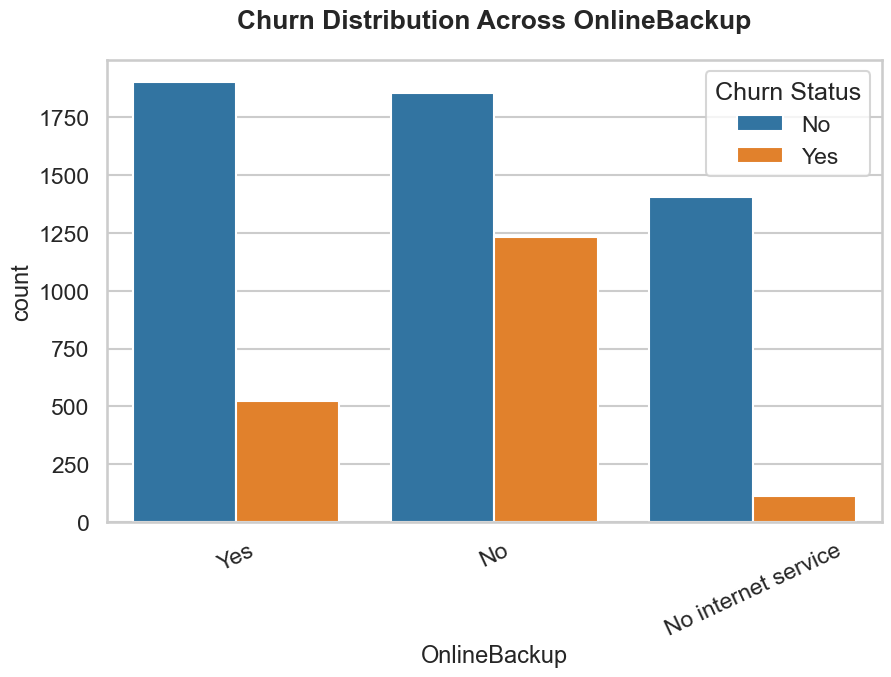

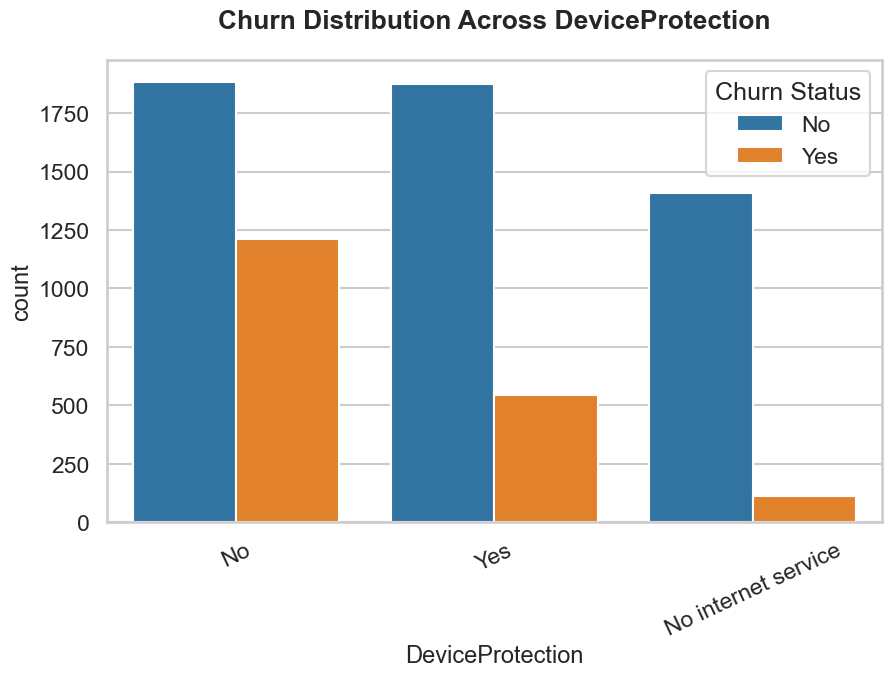

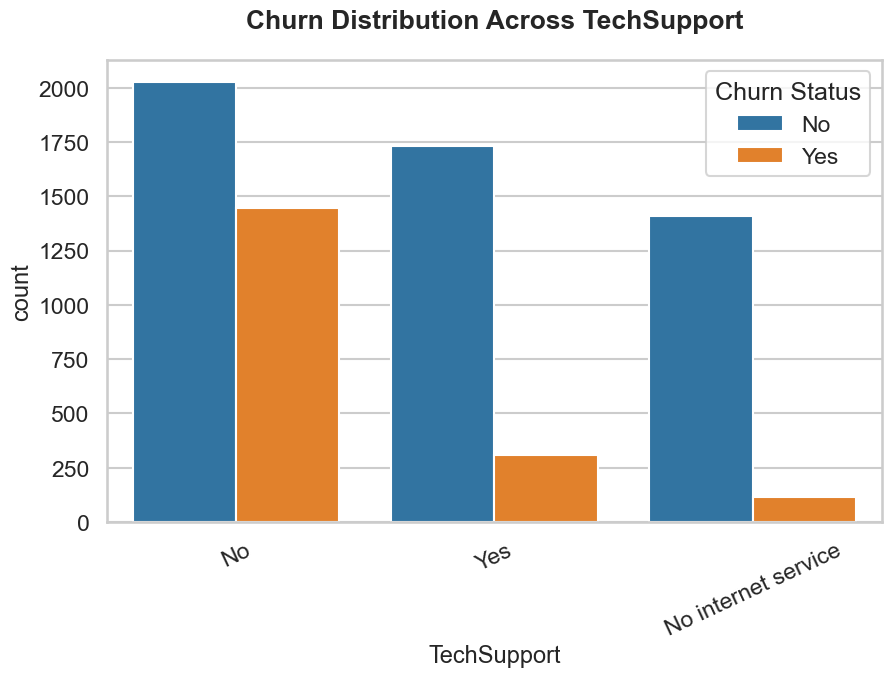

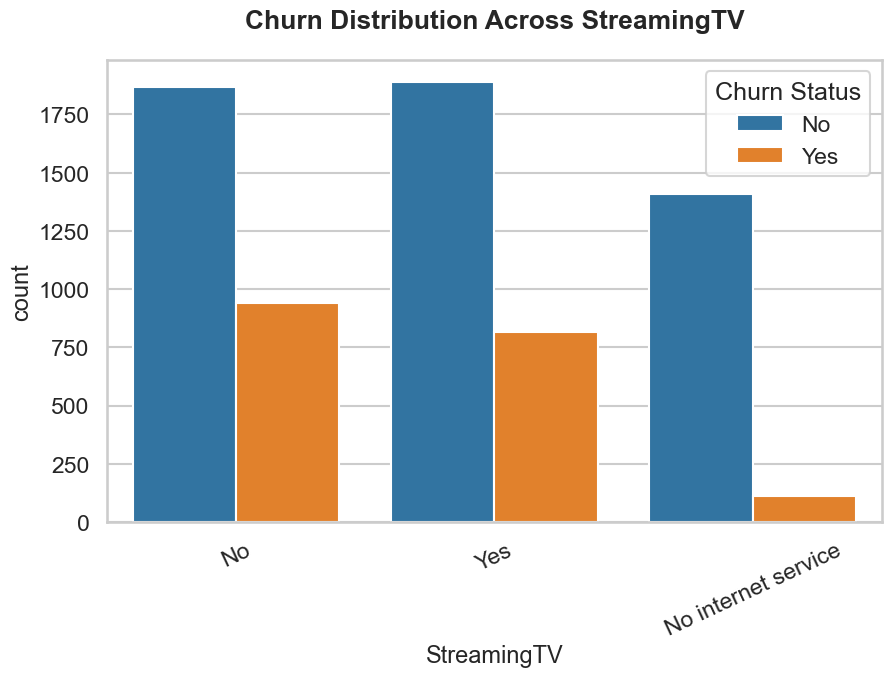

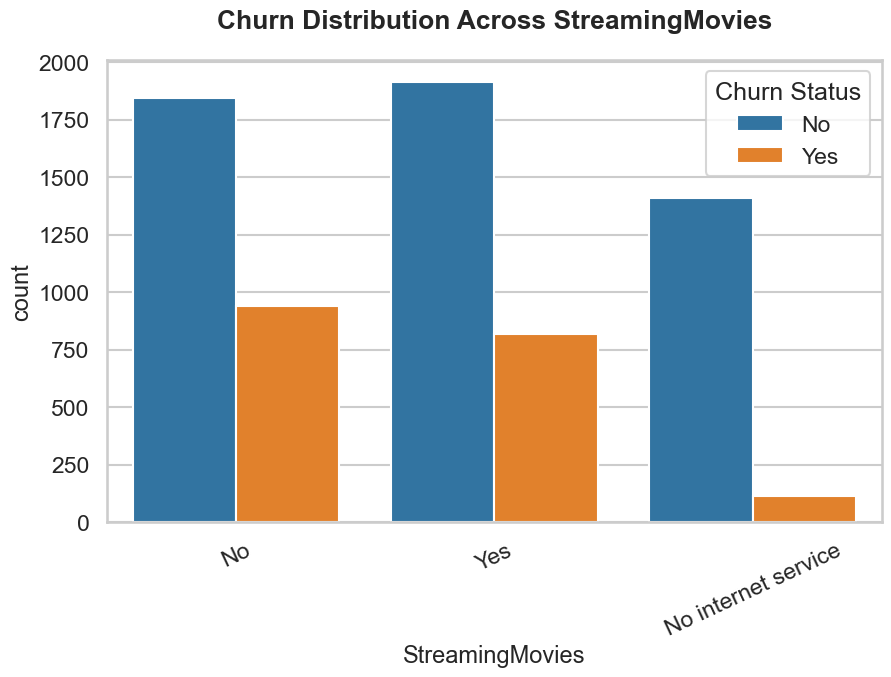

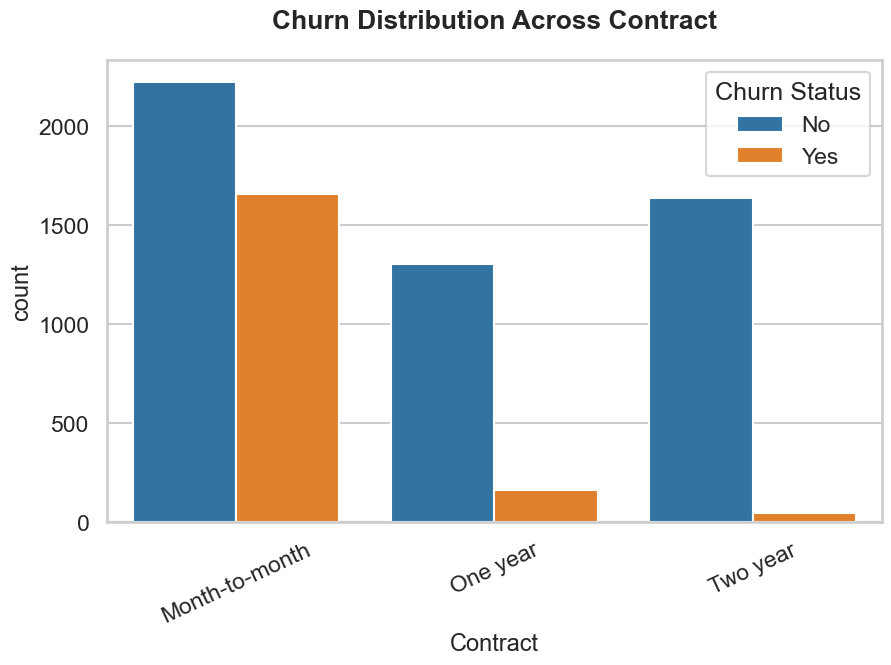

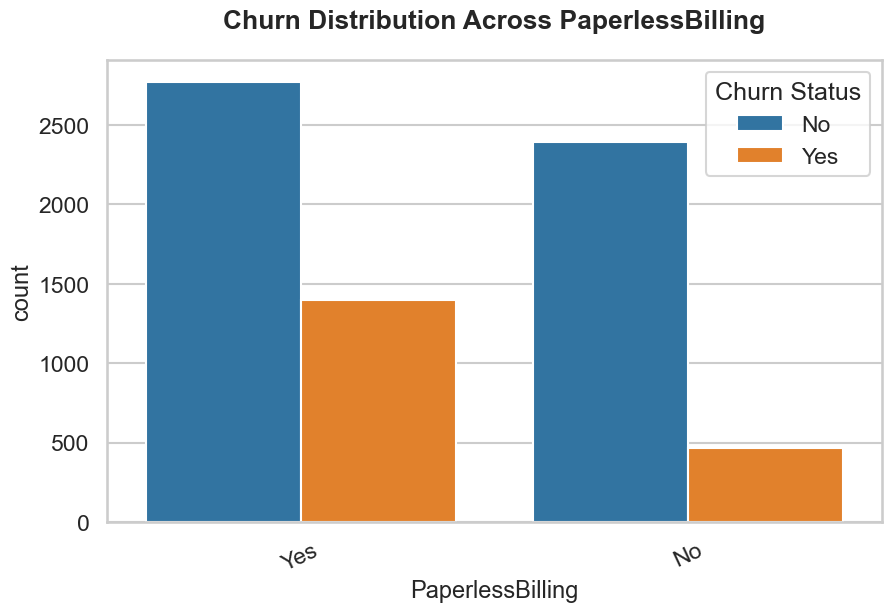

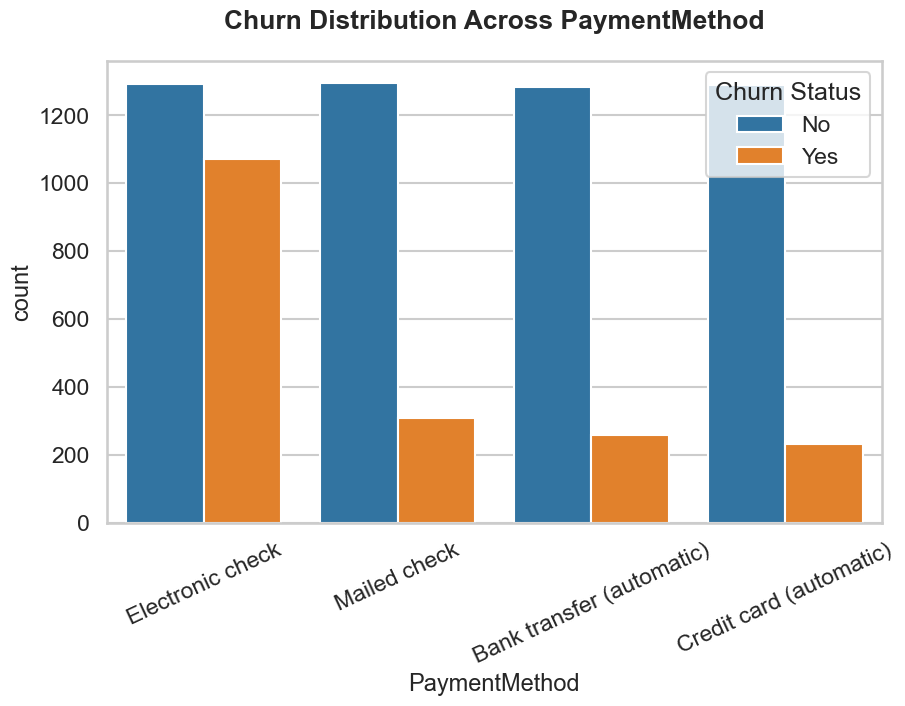

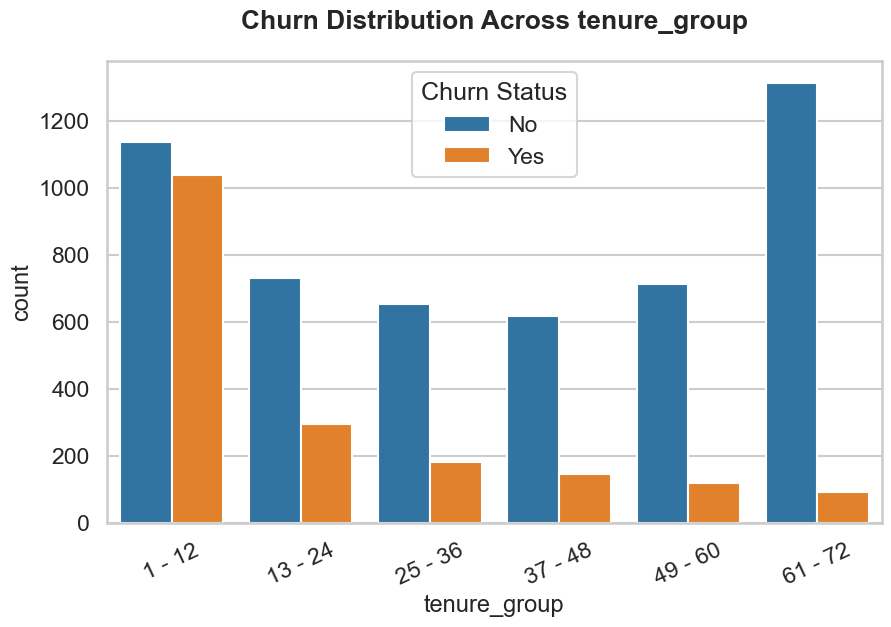

In [122]:
# visualizing the distribution of each categorical feature with respect to churn
for idx, feature in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges', 'tenure'])):
    plt.figure(idx, figsize=(10,6))
    sns.countplot(data=df, x=feature, hue='Churn')
    plt.title(f"Churn Distribution Across {feature}", fontweight='bold')
    plt.xticks(rotation=25)
    plt.legend(title='Churn Status')
    plt.show()
    print("\n\n")

Customers who use streaming movies are less likely to churn.
Month-to-month contracts have the highest churn.
One-year and two-year contracts show very low churn rates.
Churn is much higher for Fiber optic users compared to DSL users.
Paperless billing users churn more compared to those who receive paper bills.
Customers paying through electronic checks tend to churn the most.
Automatic payments (bank transfer or credit card) users are more stable.
New customers with less than a year of tenure churn the most.
Customers with higher tenure rarely churn.

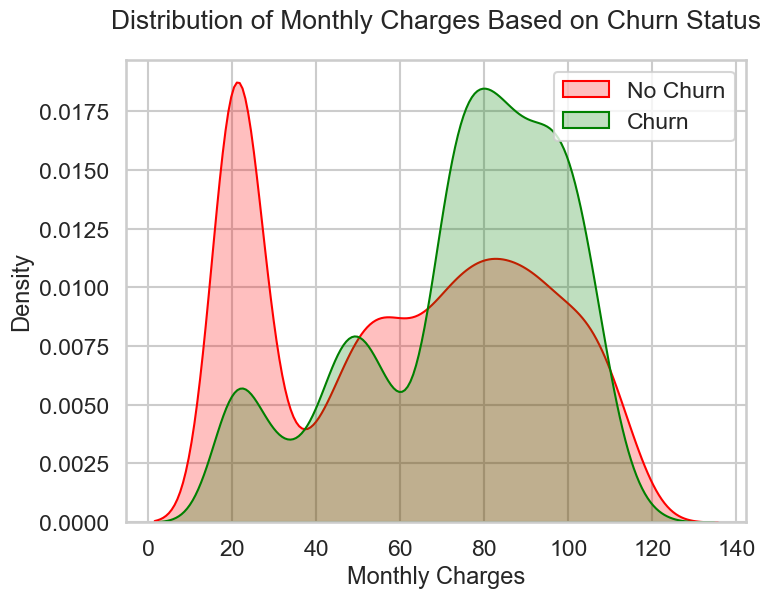

In [123]:
# visualizing the distribution of Monthly Charges for churned and non-churned customers
plt.figure(figsize=(8,6))
sns.kdeplot(df[df["Churn"]=='No']['MonthlyCharges'], shade=True, color='red', label="No Churn")
sns.kdeplot(df[df['Churn']=='Yes']['MonthlyCharges'], shade=True, color='green', label="Churn")
plt.legend(loc='upper right')
plt.xlabel("Monthly Charges")
plt.title('Distribution of Monthly Charges Based on Churn Status')
plt.show()  

##Customers with higher monthly charges tend to have a higher churn rate.

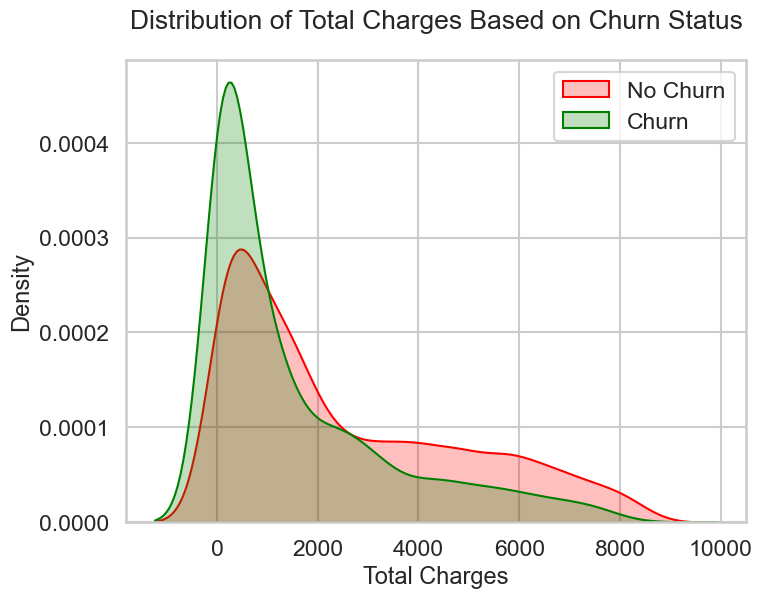

In [124]:
# visualizing the distribution of Total Charges for churned and non-churned customers
plt.figure(figsize=(8,6))
sns.kdeplot(df[df['Churn']=='No']['TotalCharges'], shade=True, color='red', label="No Churn")
sns.kdeplot(df[df['Churn']=='Yes']['TotalCharges'], shade=True, color='green', label='Churn')
plt.legend(loc='upper right')
plt.xlabel('Total Charges')
plt.title("Distribution of Total Charges Based on Churn Status")
plt.show()

Churn tends to be higher when Total Charges are lower.

However, when analyzing Tenure, Monthly Charges, and Total Charges together, 
a clearer pattern emerges—higher Monthly Charges with shorter Tenure lead to lower Total Charges. 
This suggests that customers with high Monthly Charges, low Tenure, and low Total Charges are more likely to churn.

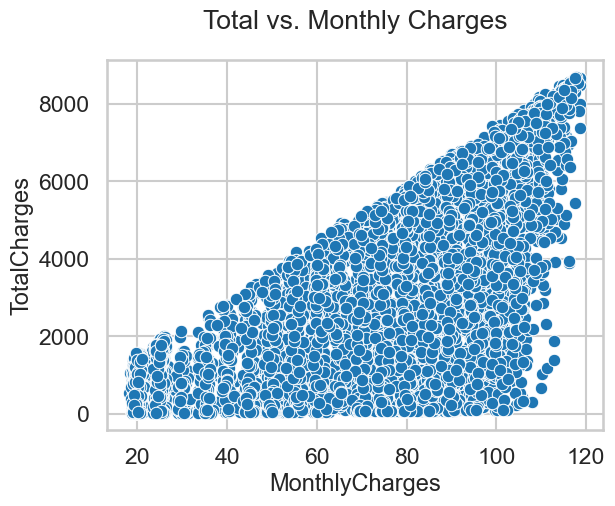

In [125]:
## Bivariate analysis

# Relation berween Monthly Charges and Total Charges
sns.scatterplot(df, x='MonthlyCharges', y='TotalCharges')
plt.title("Total vs. Monthly Charges")
plt.show()

In [126]:
##Total Charges increase as Monthly Charges increase.

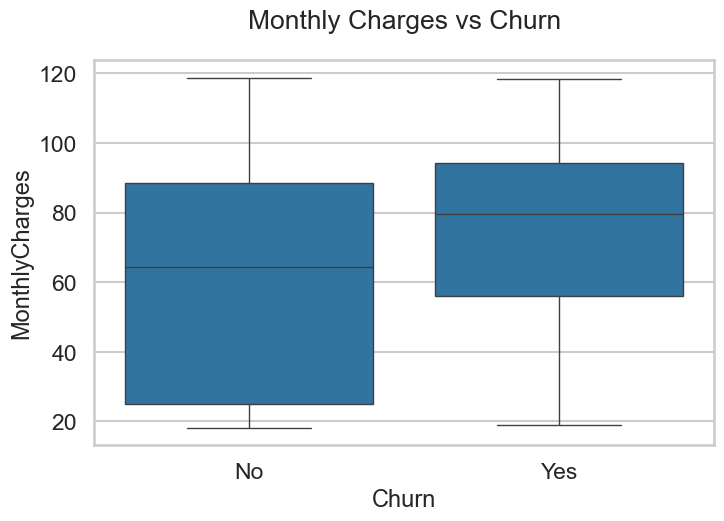

In [127]:
plt.figure(figsize=(8,5))
sns.boxplot(df,x="Churn", y='MonthlyCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

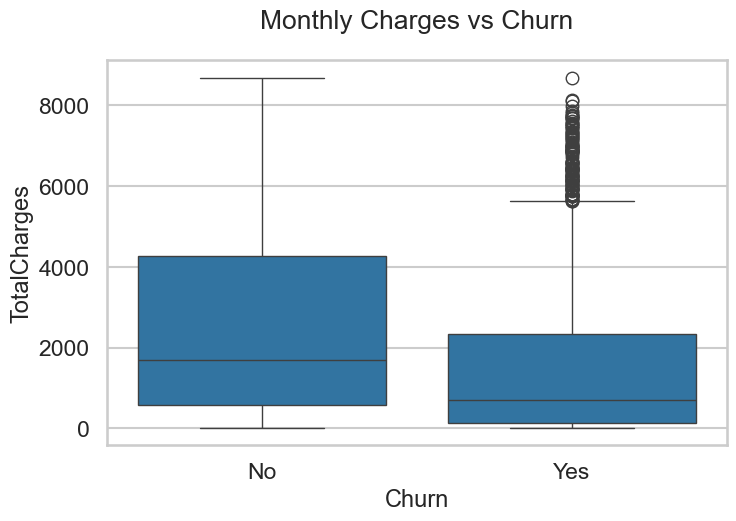

In [128]:
plt.figure(figsize=(8,5))
sns.boxplot(df,x="Churn", y='TotalCharges')
plt.title('Monthly Charges vs Churn')
plt.show()

In [129]:
# spliting data based on churn status
churn_yes = df[df["Churn"]=='Yes']
churn_no = df[df["Churn"]=='No']

In [130]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'], dtype=object)

In [131]:
def plot_stacked_bar(feature):
    crosstab = pd.crosstab(df[feature], df['Churn'])
    crosstab_norm = crosstab.div(crosstab.sum(axis=1), axis=0)
    crosstab_norm.plot(kind='bar', stacked=True, figsize=(8,5))
    plt.title(f"Stacked Bar Chart for {feature}", fontweight='bold')
    plt.ylabel('Proportion')
    plt.legend(title='Churn', bbox_to_anchor=(1.05, 1))
    plt.xticks(rotation=25)
    plt.show()

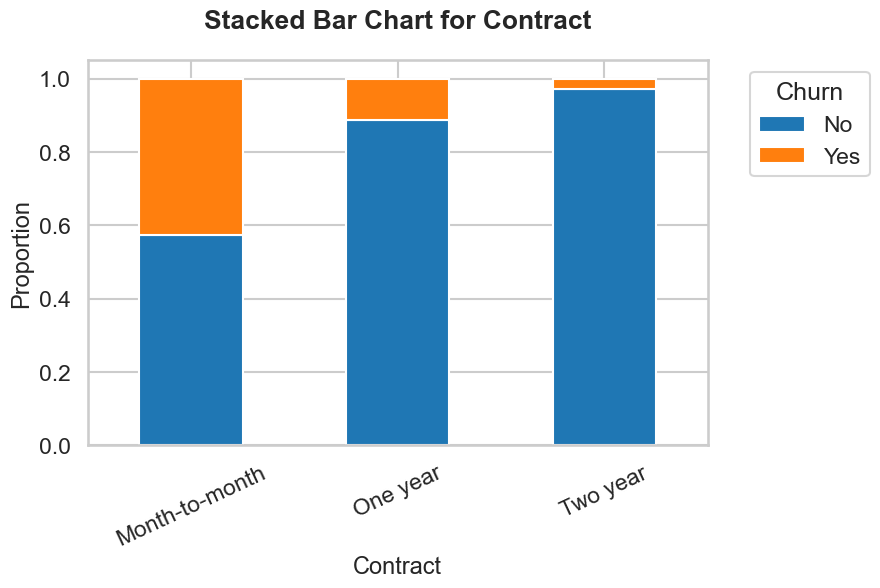

In [132]:
plot_stacked_bar('Contract')

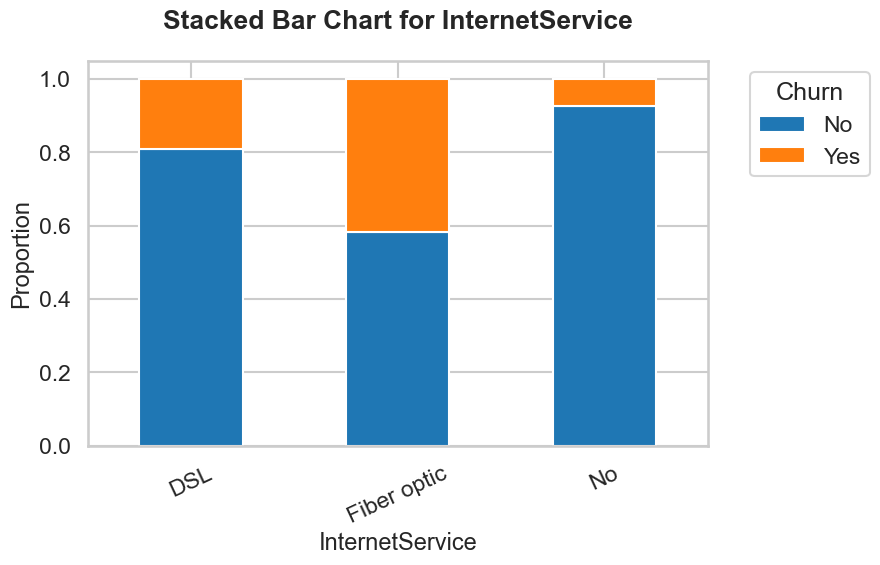

In [133]:
plot_stacked_bar('InternetService')

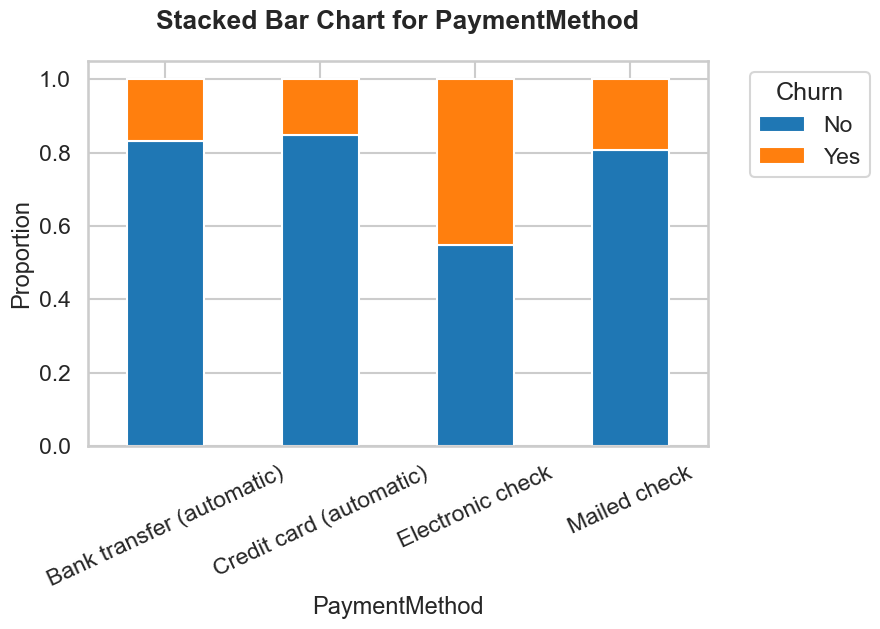

In [134]:
plot_stacked_bar('PaymentMethod')

In [230]:
# custom plotng fucntion for categorical variables
def custom_plot(data, feature, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams.update({'axes.labelsize':17, 'axes.titlesize':19, 'axes.titlepad':23})

    feature_unique_count = data[feature].nunique()
    hue_unique_count = data[hue].nunique() if hue else 0
    width = feature_unique_count + 7 + 4 * hue_unique_count
    
    fig, ax = plt.subplots(figsize=(width, 8))

    plt.xticks(rotation=25)
    plt.yscale('log')
    plt.title(title, fontweight='bold')

    sns.countplot(data=data, x=feature, hue=hue, order=data[feature].value_counts().index, palette='Set2', ax=ax)
    plt.show()

In [232]:
df.columns.values

array(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'], dtype=object)

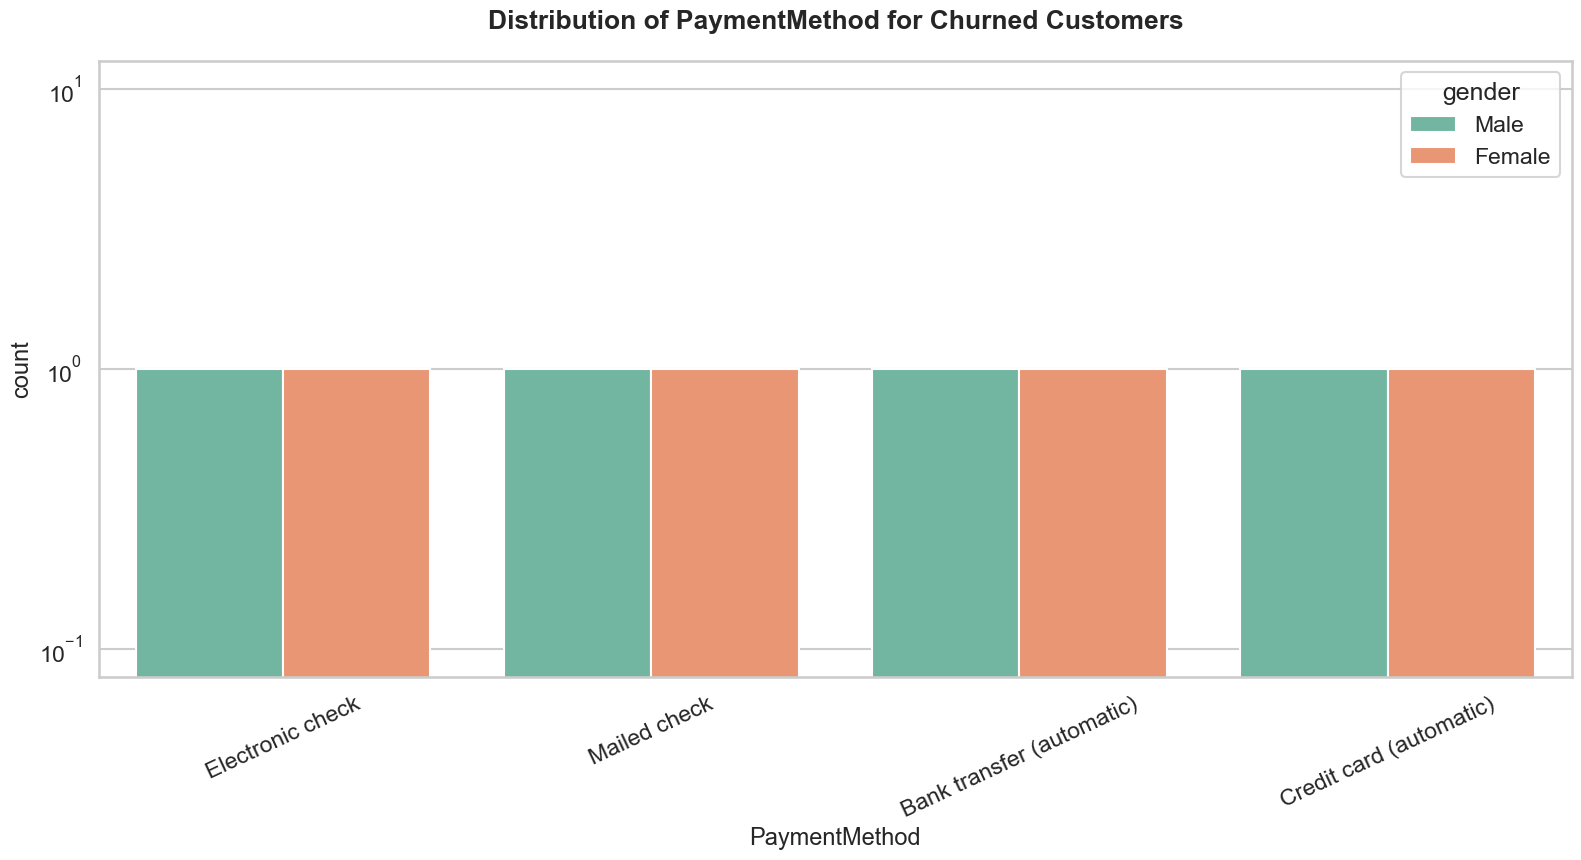

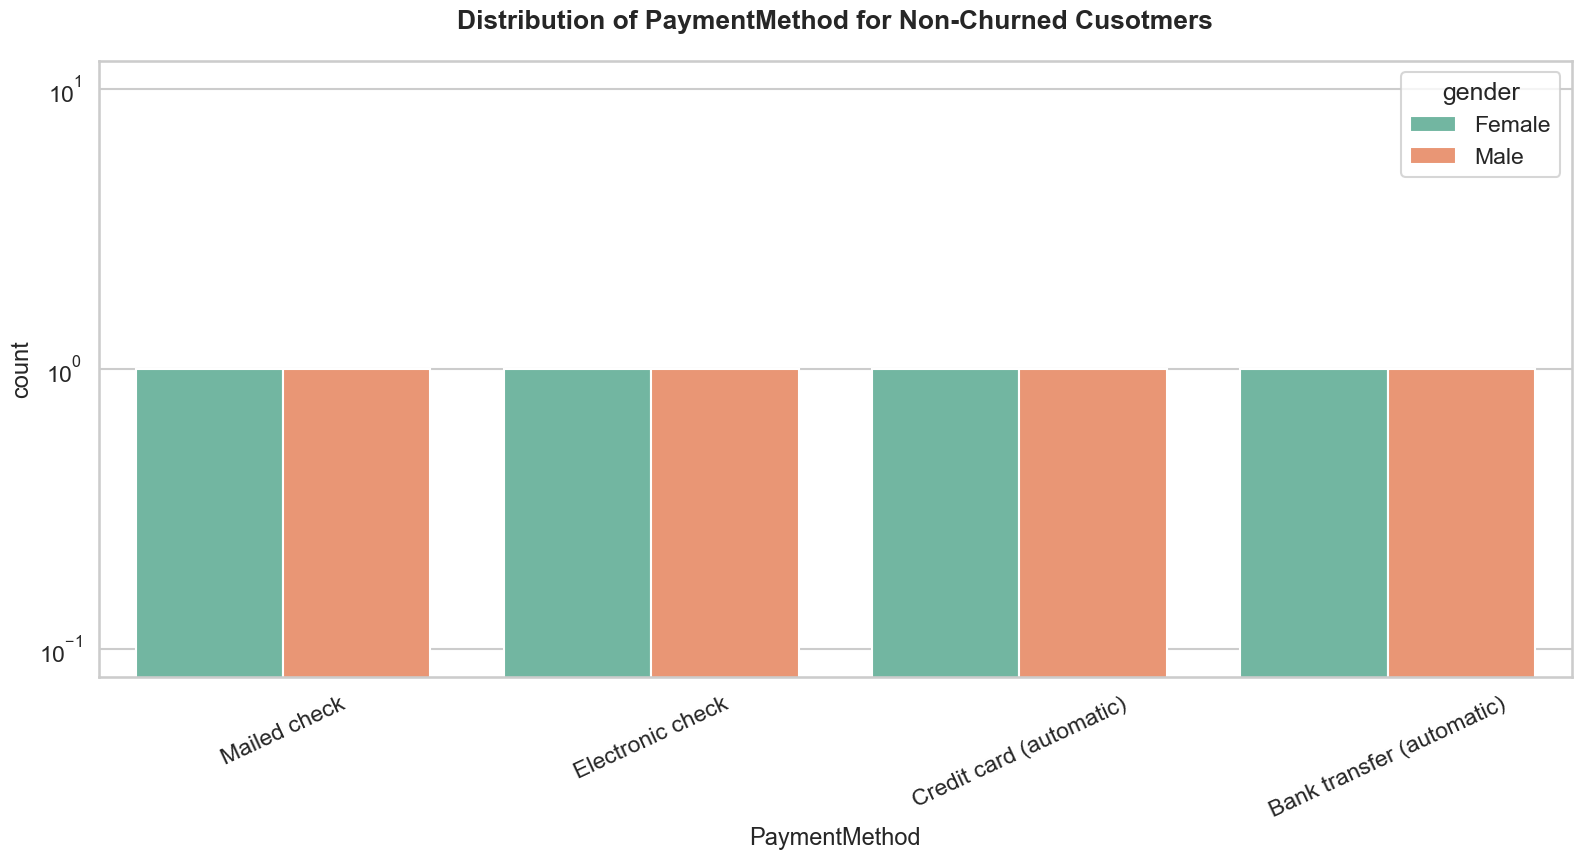

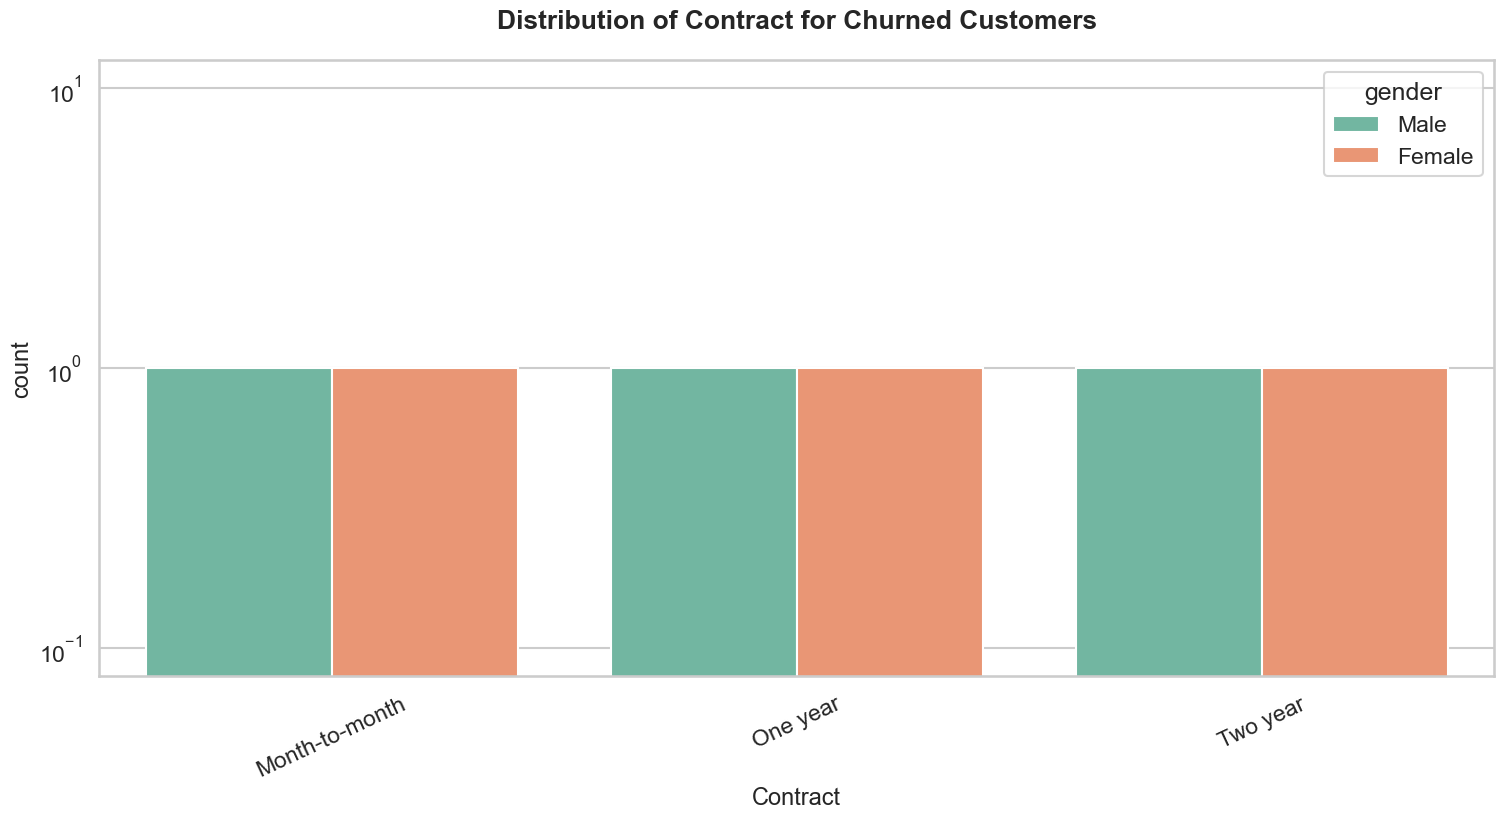

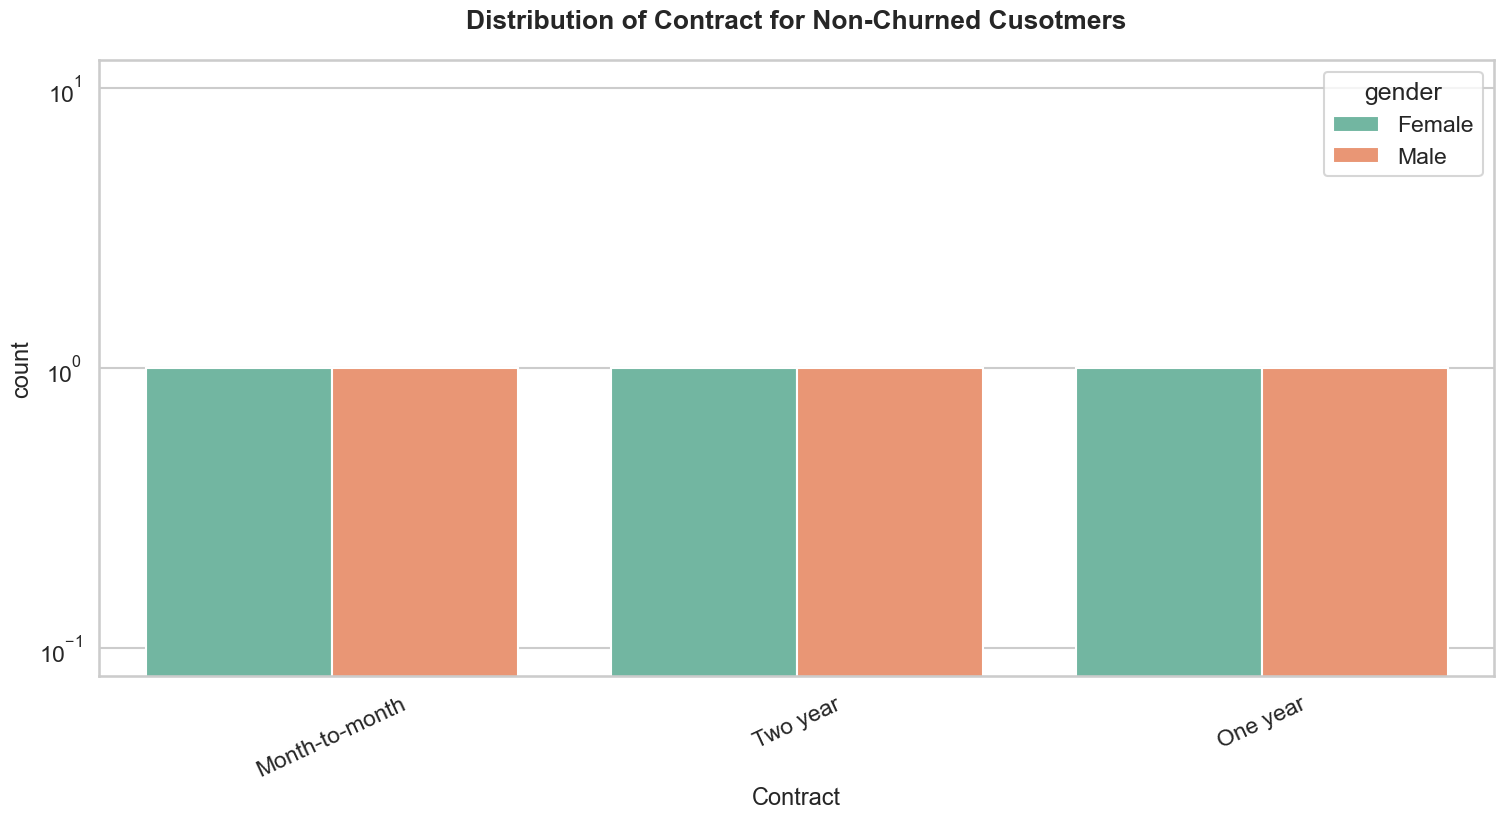

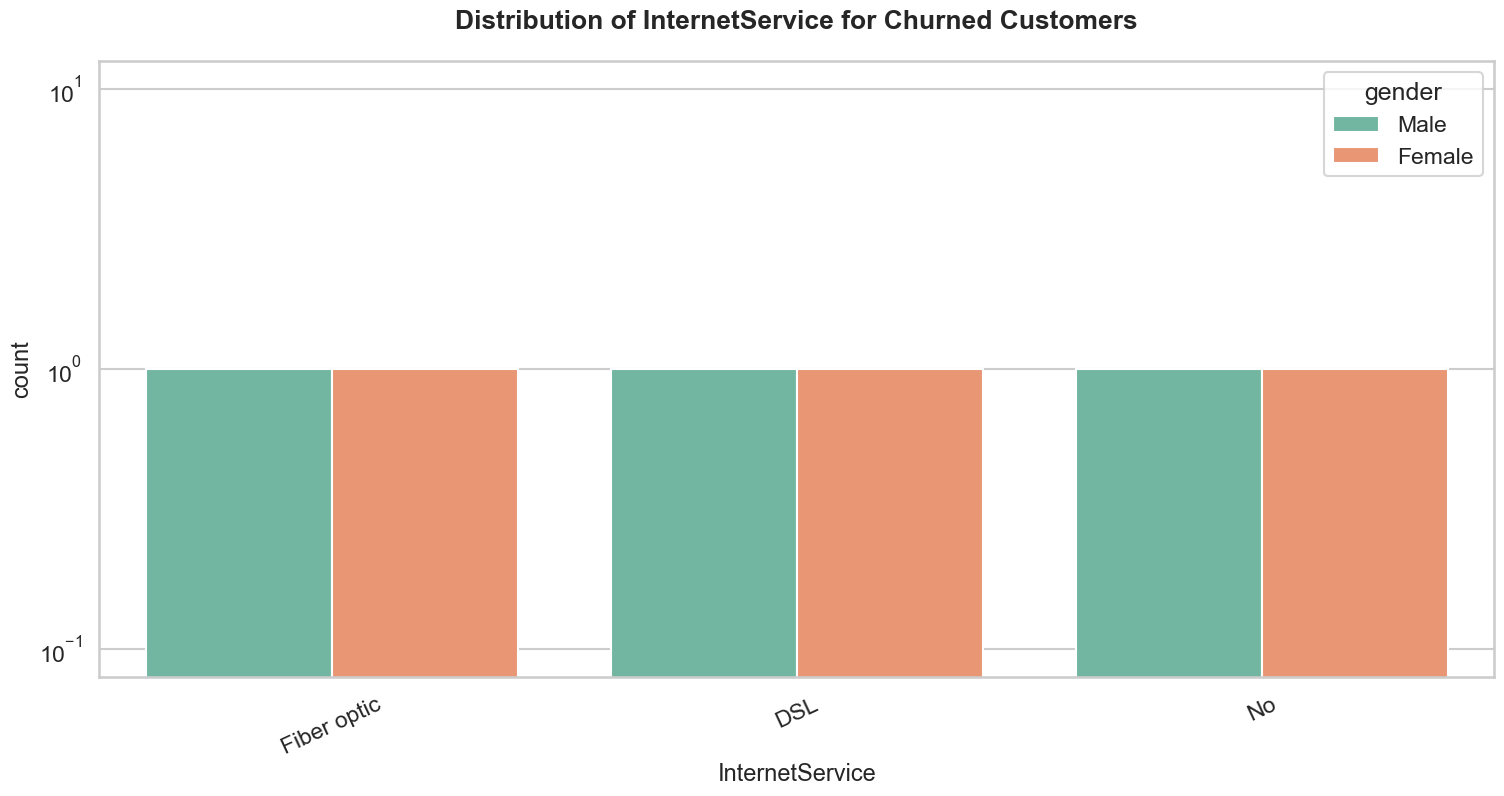

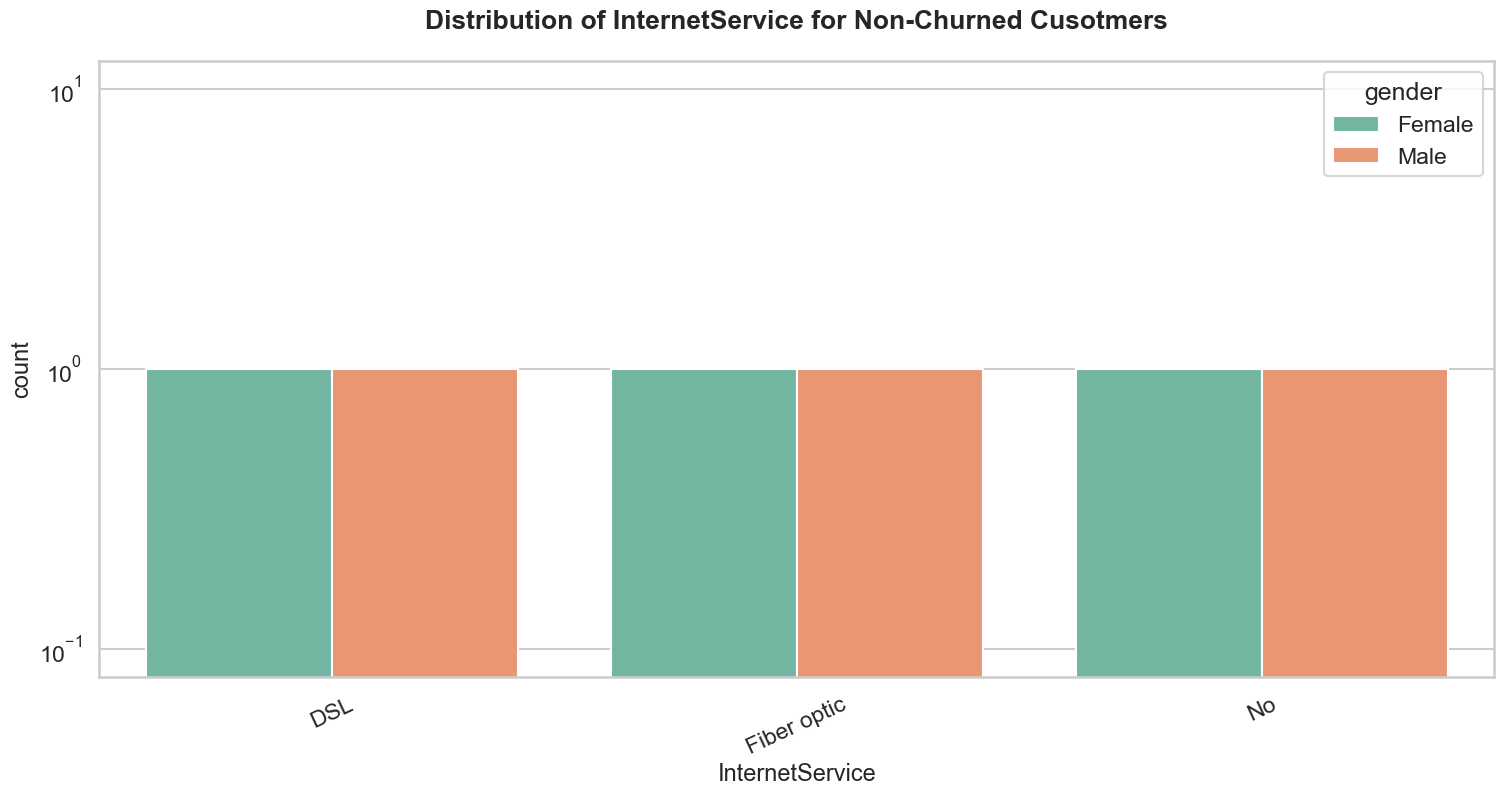

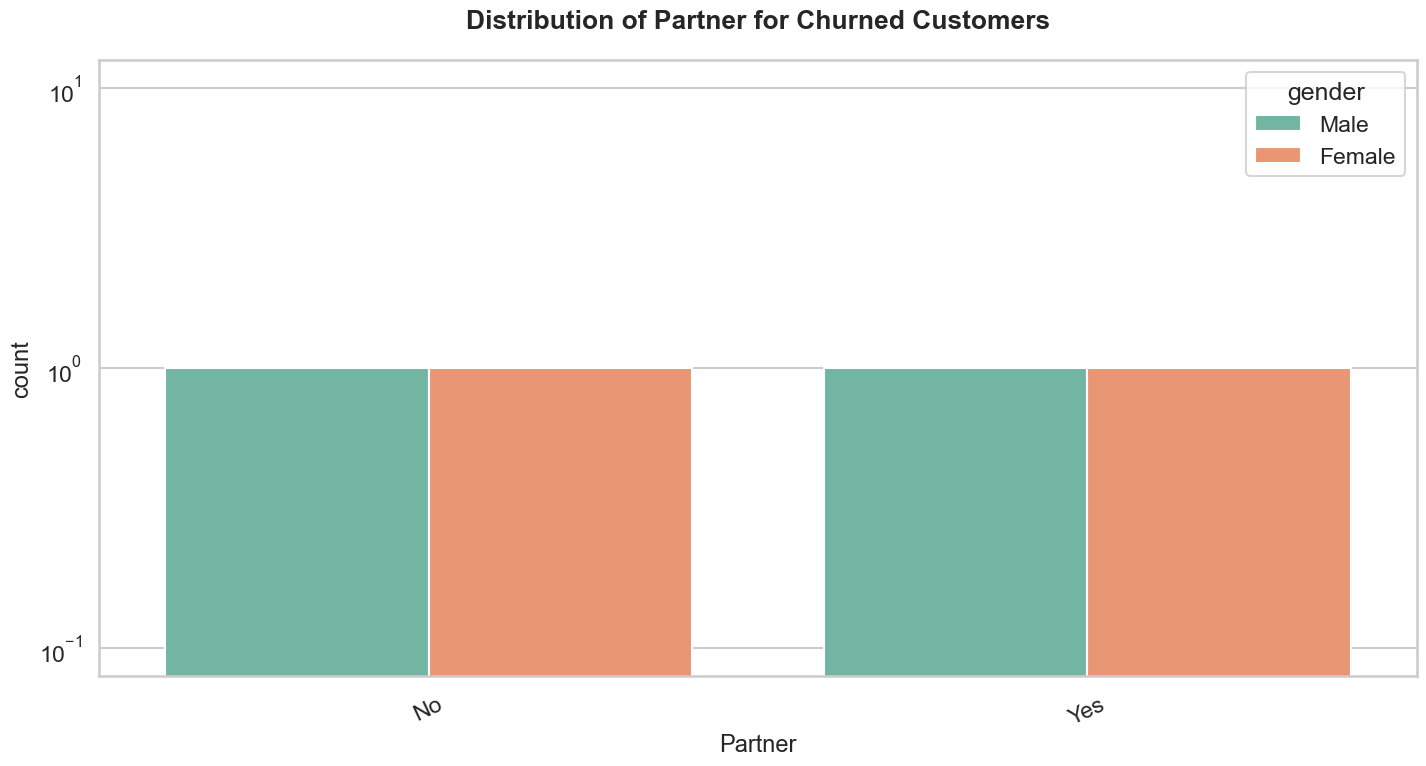

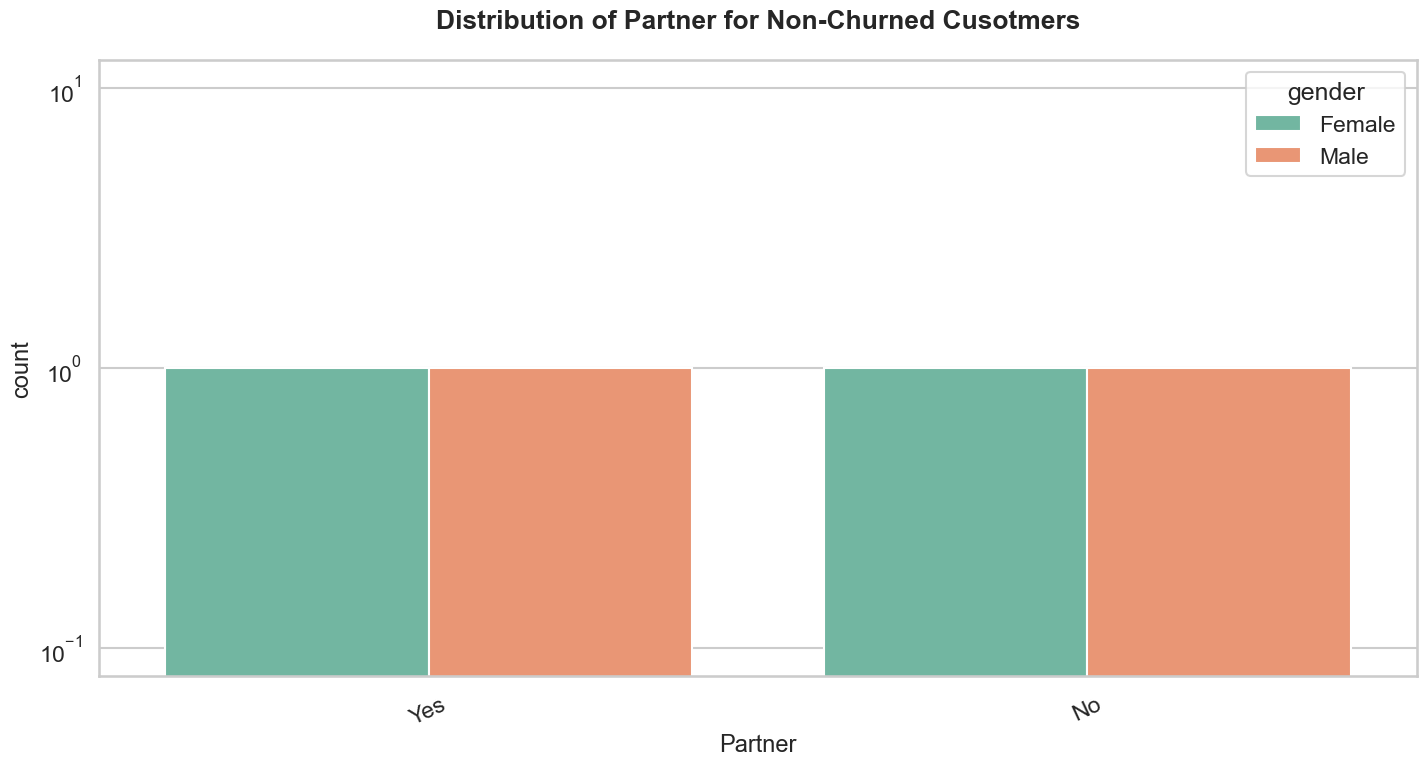

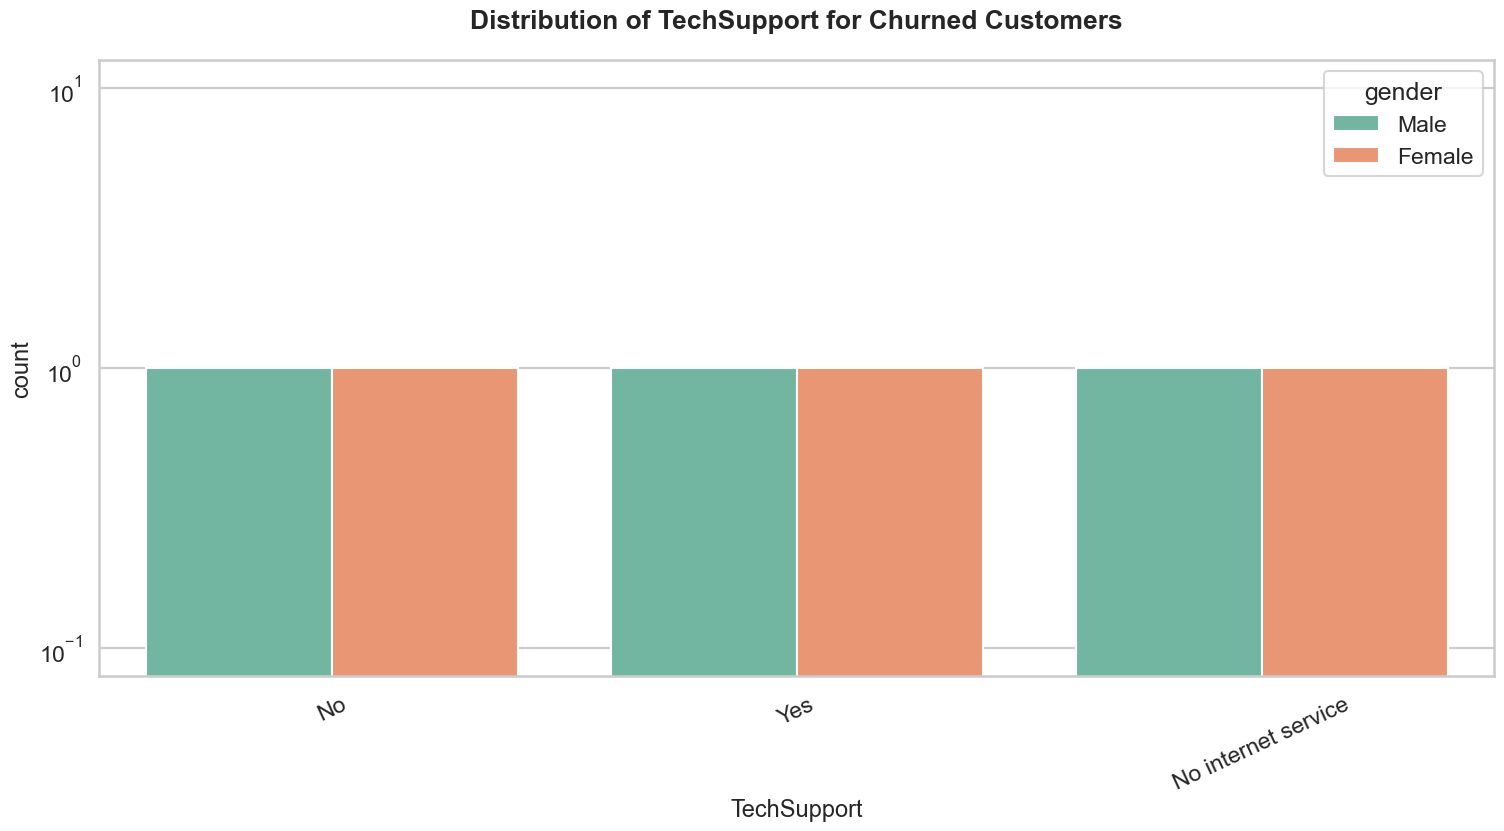

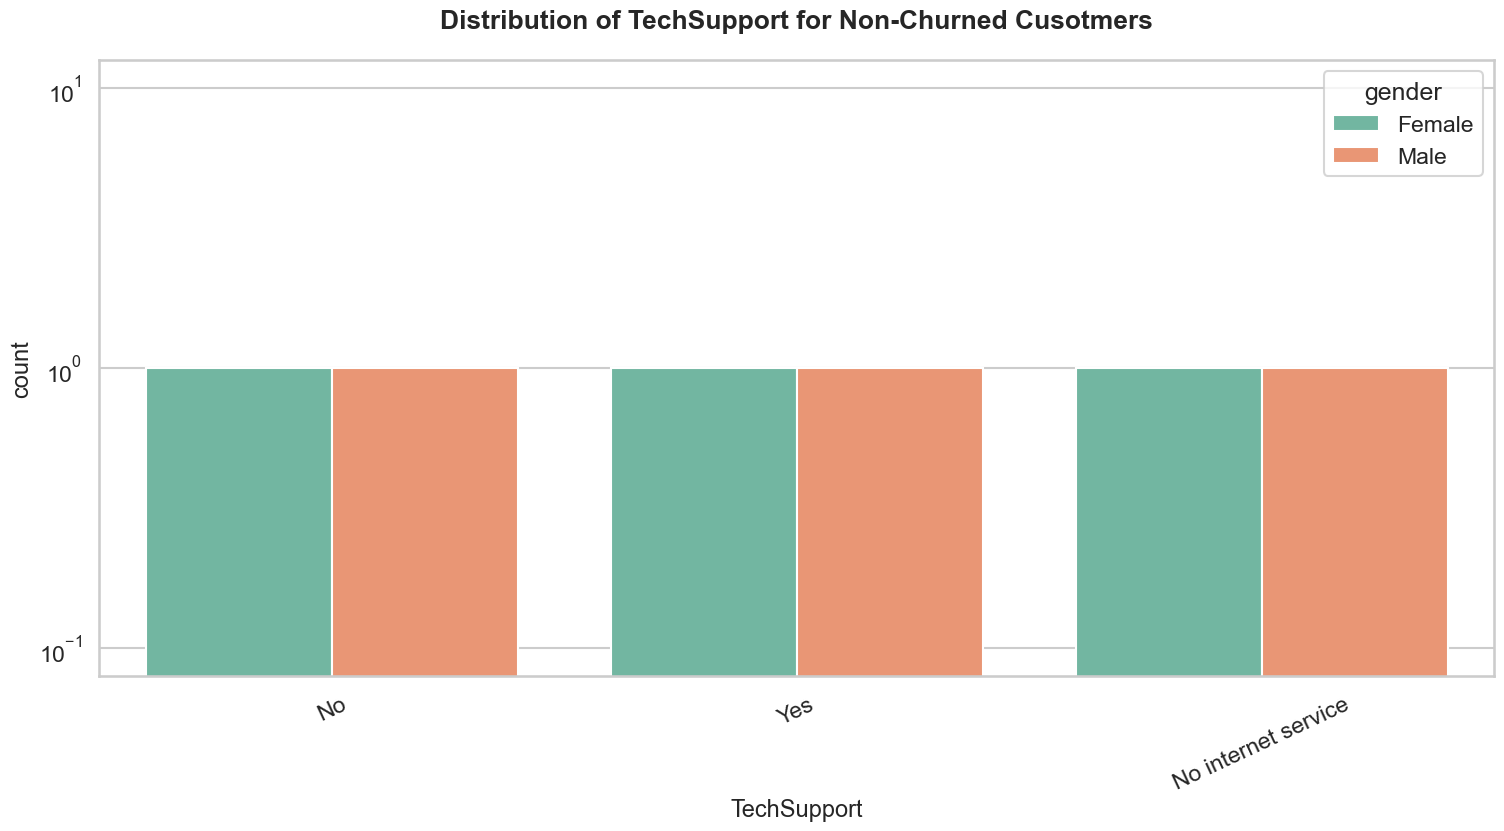

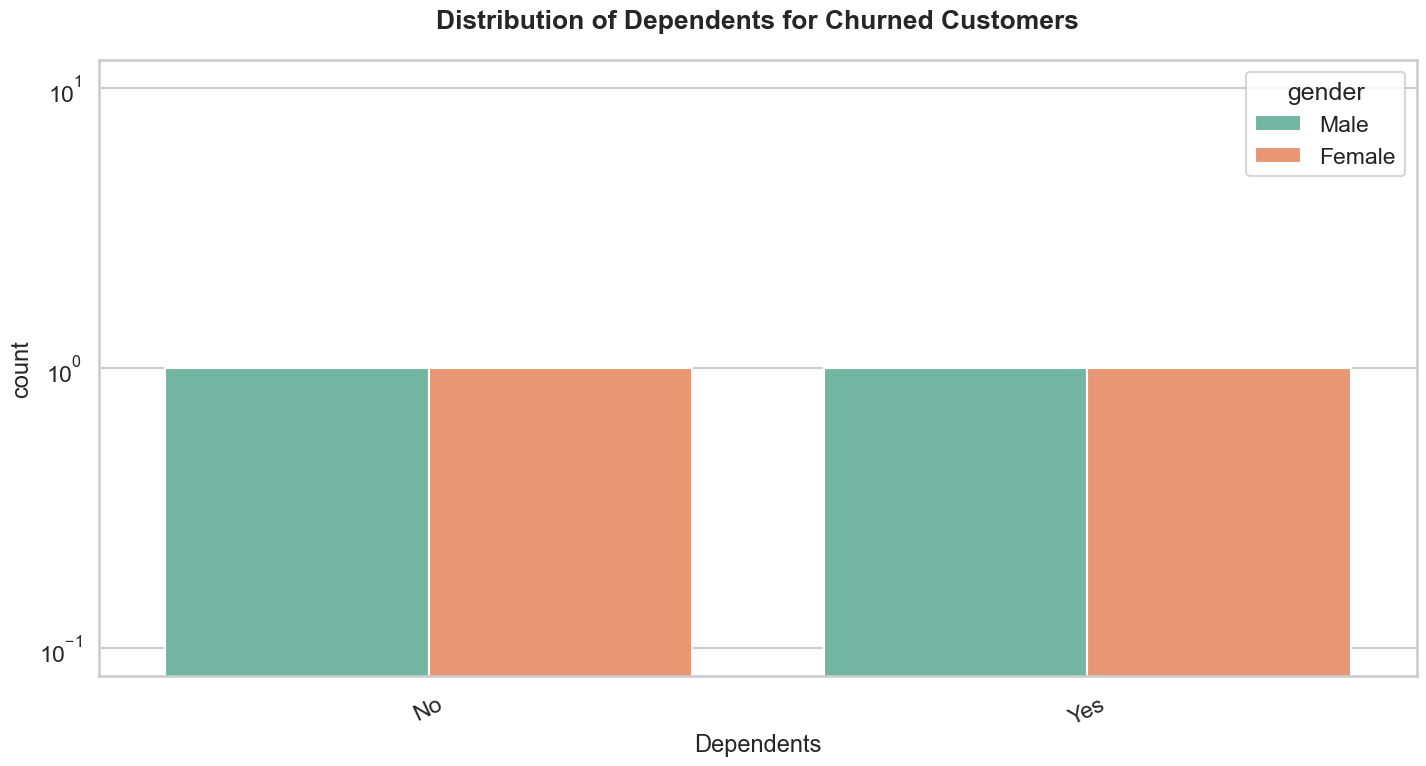

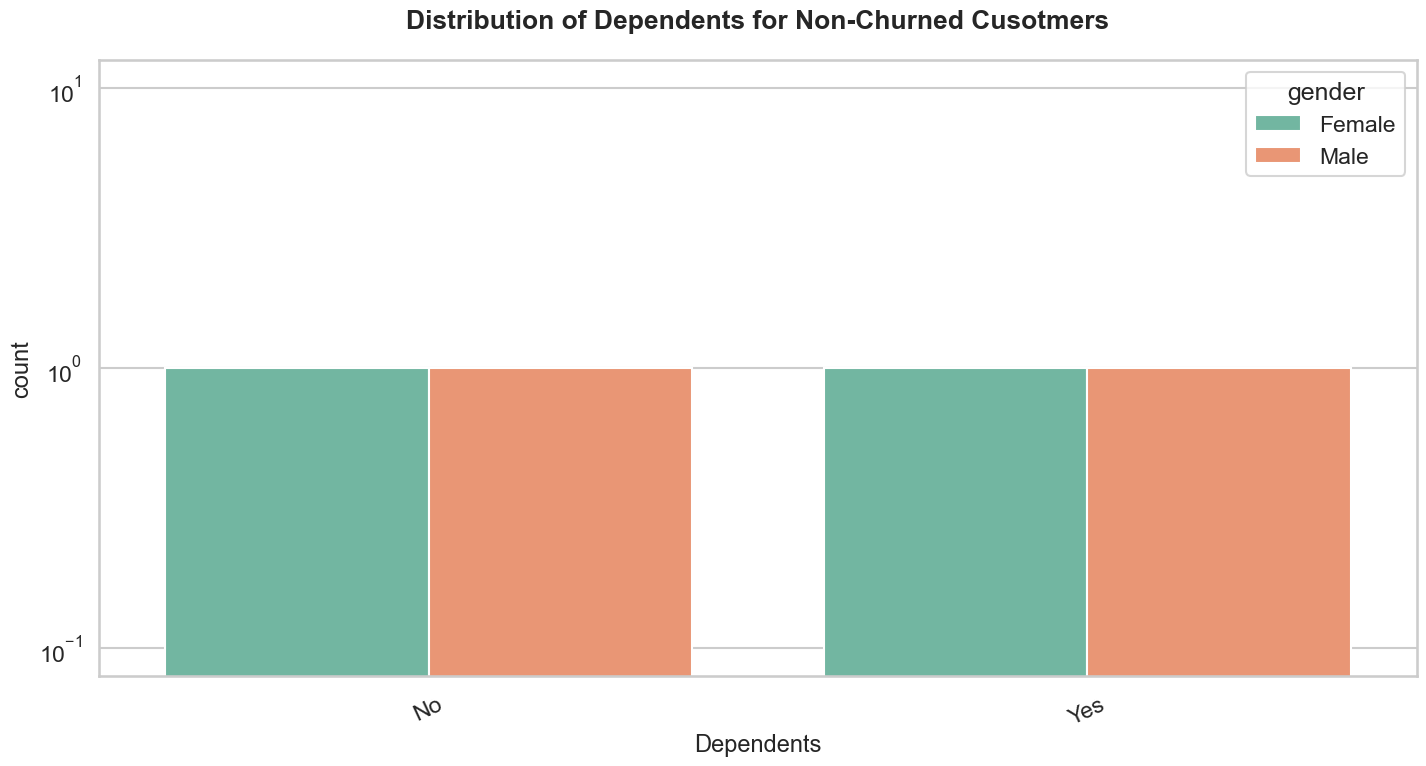

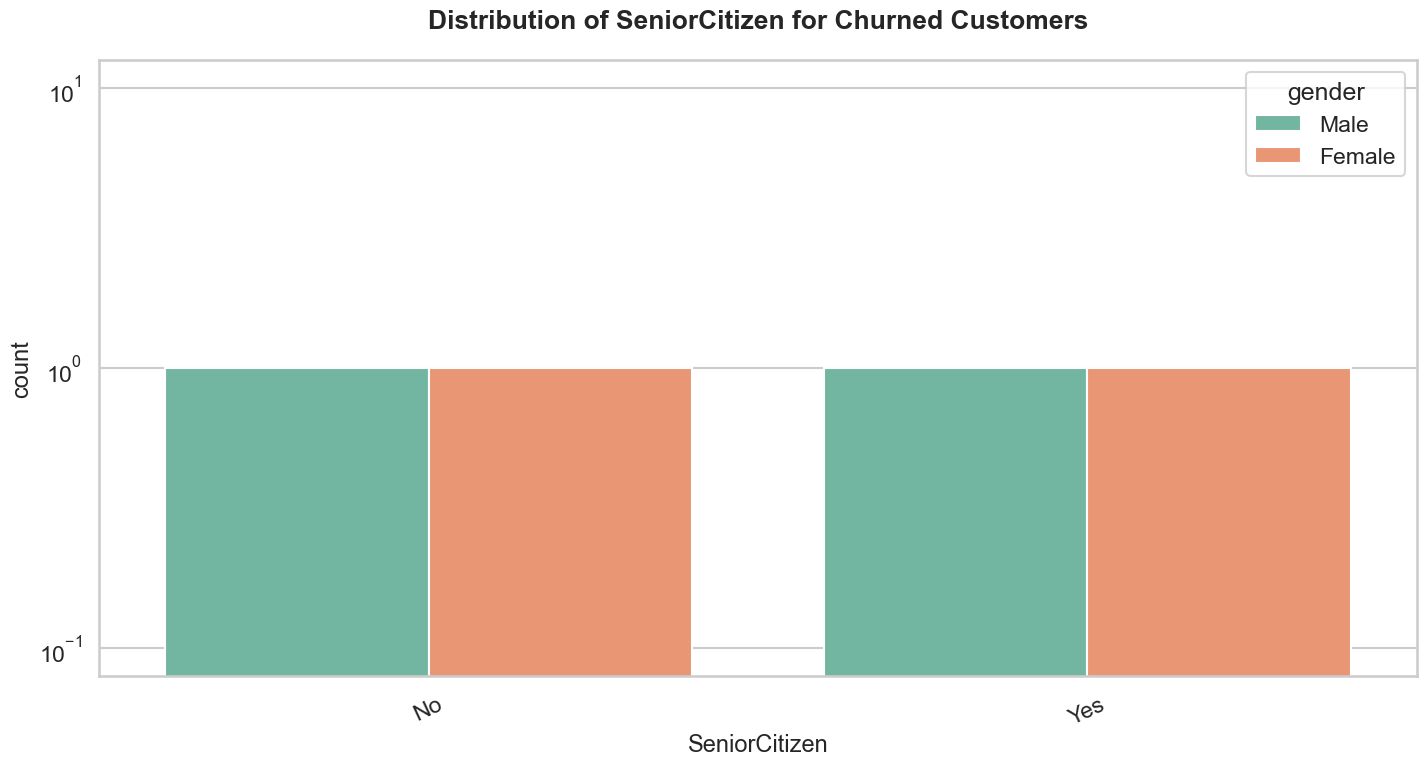

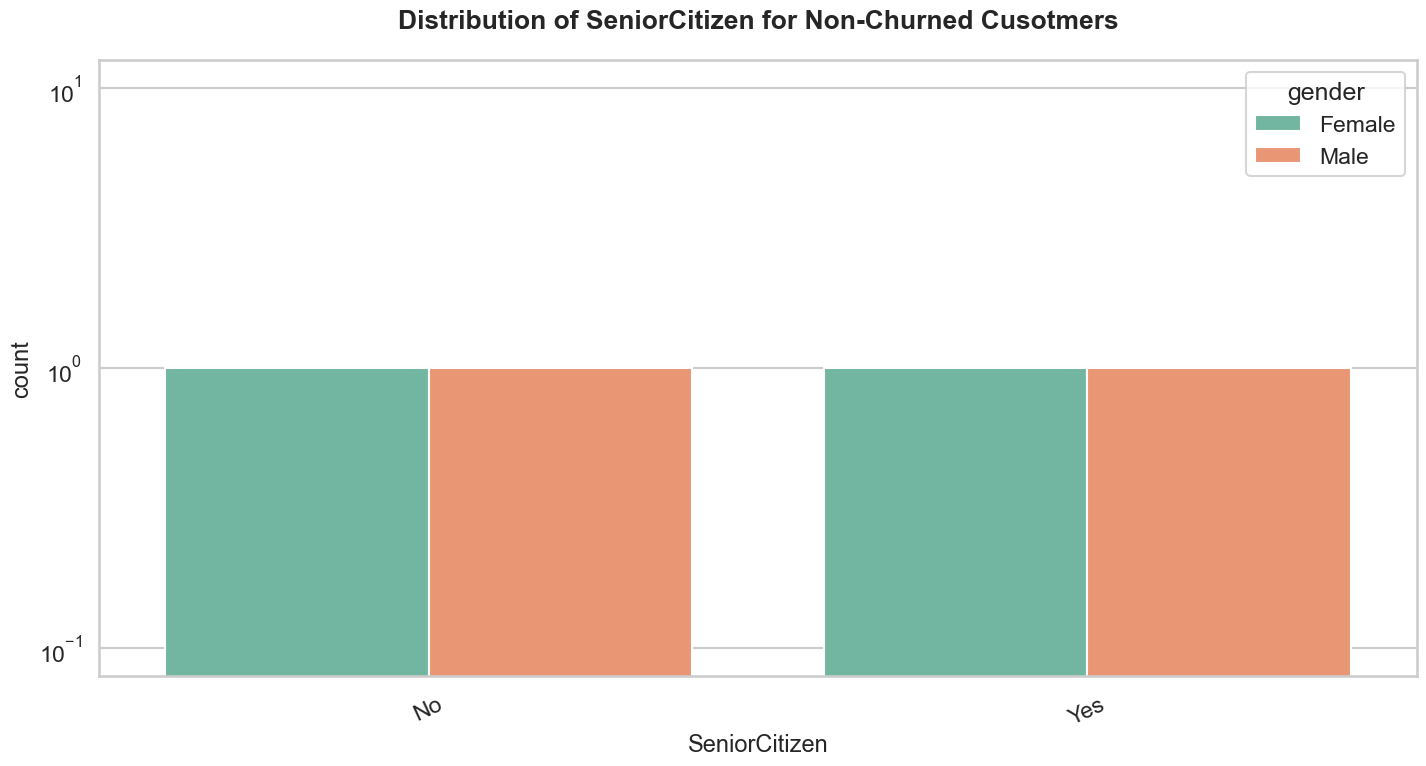

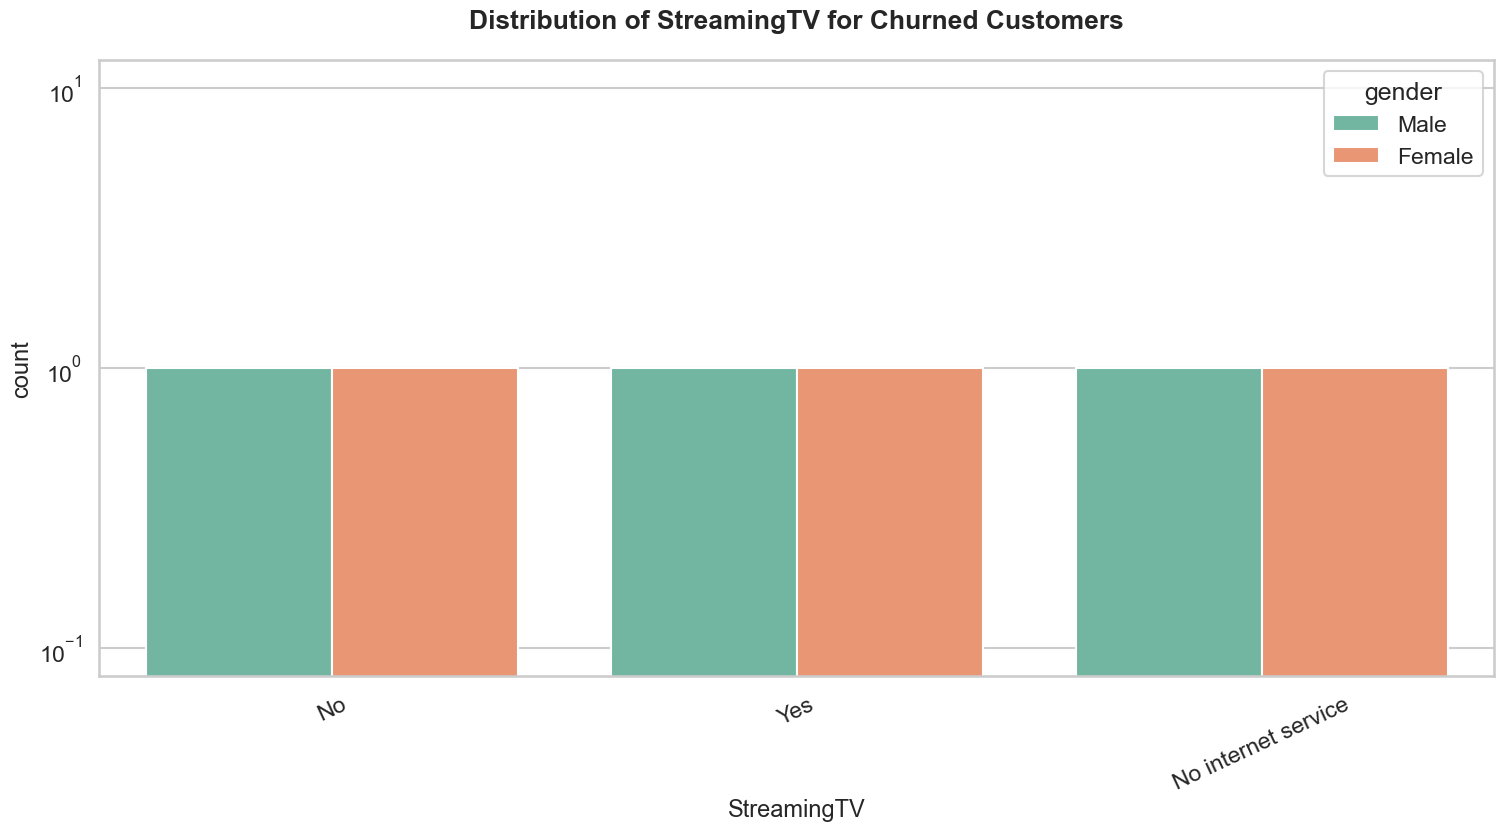

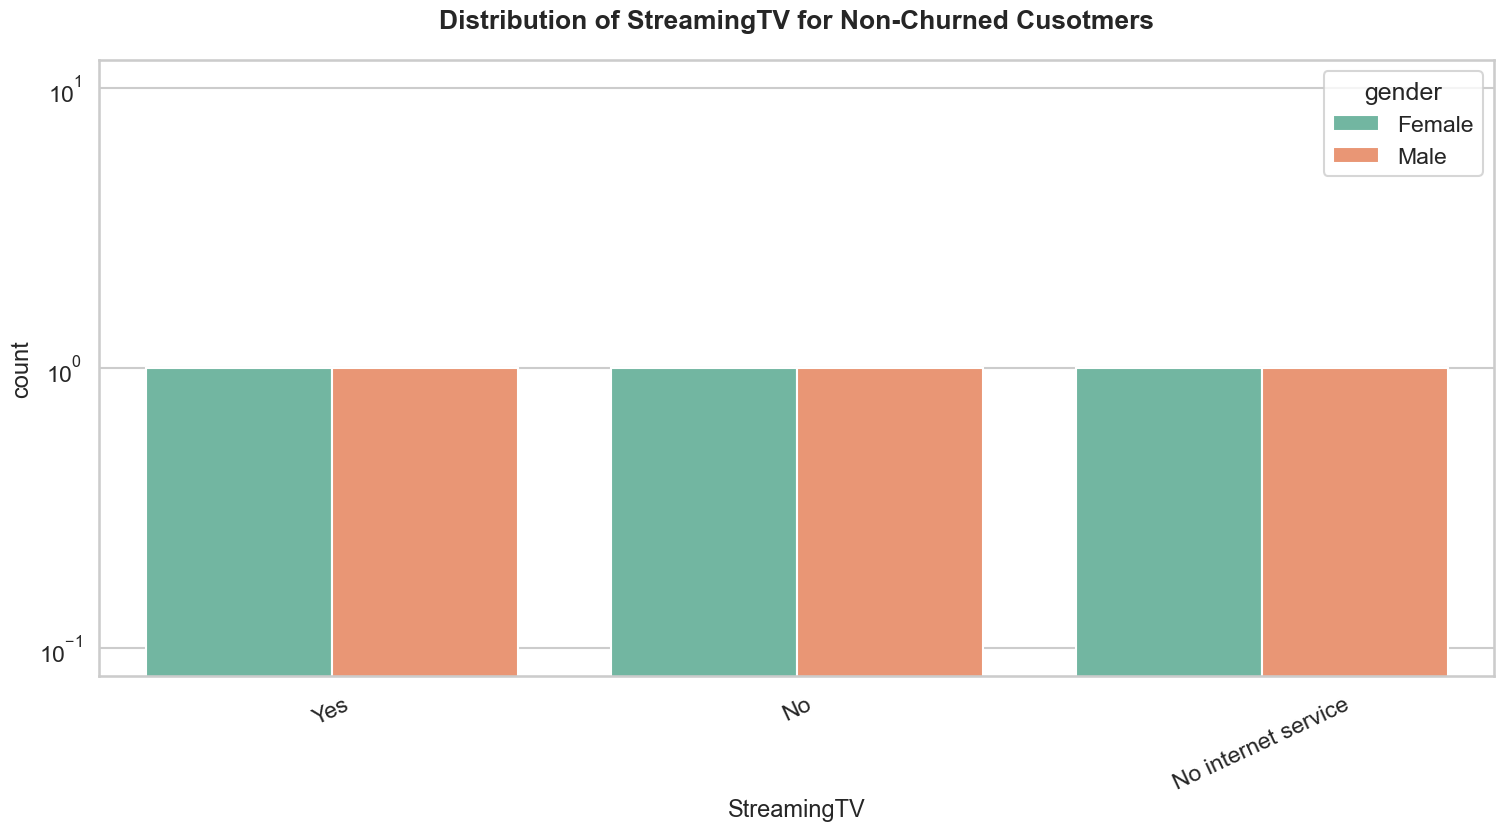

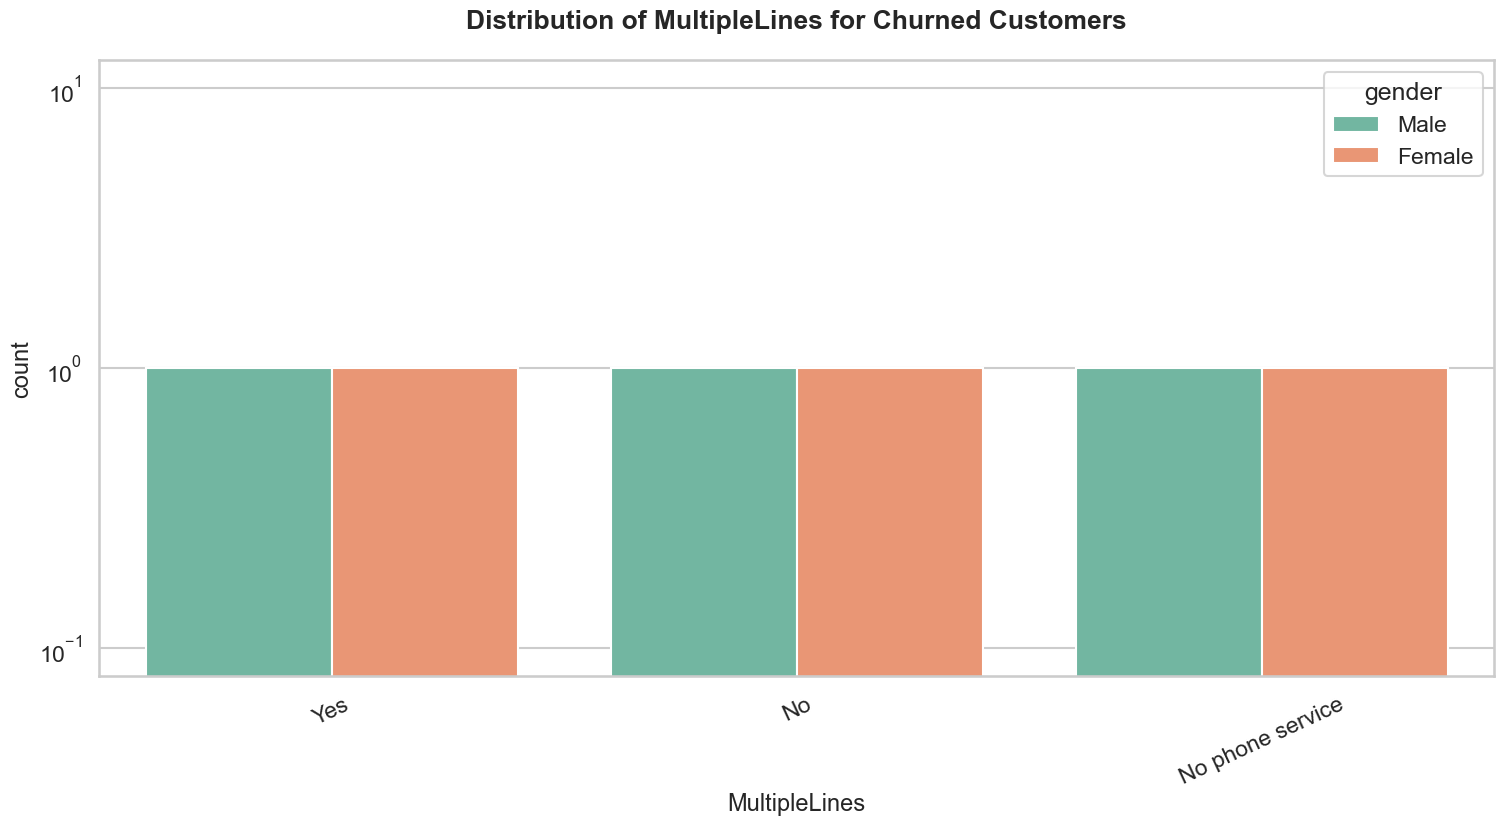

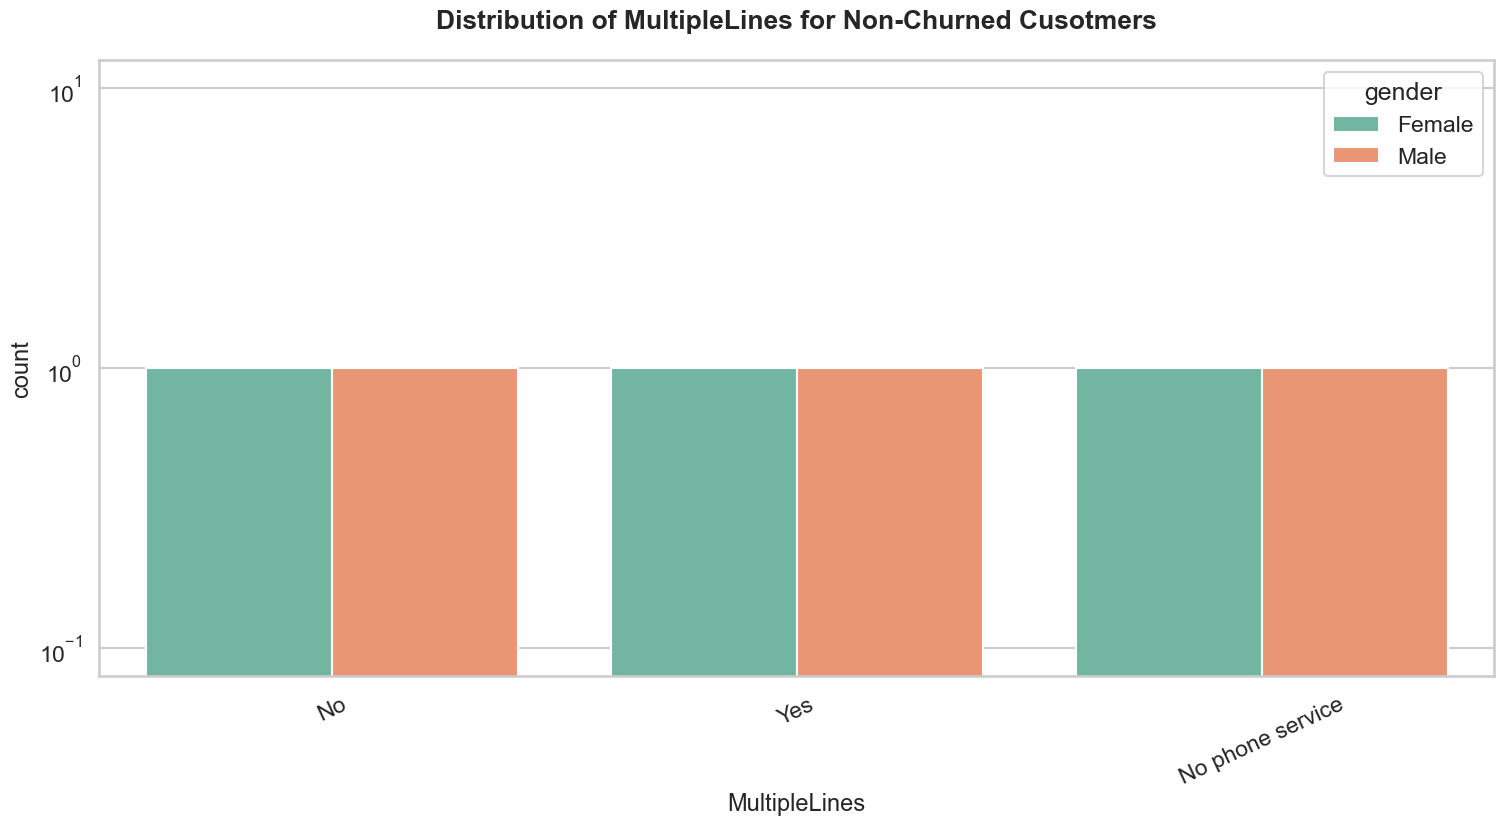

In [234]:
cat_features = ['PaymentMethod', 'Contract', 'InternetService', 'Partner', 'TechSupport', 'Dependents', 'SeniorCitizen', 'StreamingTV', 'MultipleLines']

for feature in cat_features:
    # plot for churned customers
    custom_plot(churn_yes, feature=feature, title=f'Distribution of {feature} for Churned Customers', hue='gender')
    print("\n")
    # plot for non churned customers
    custom_plot(churn_no, feature=feature, title=f'Distribution of {feature} for Non-Churned Cusotmers', hue='gender')
    print("\n")

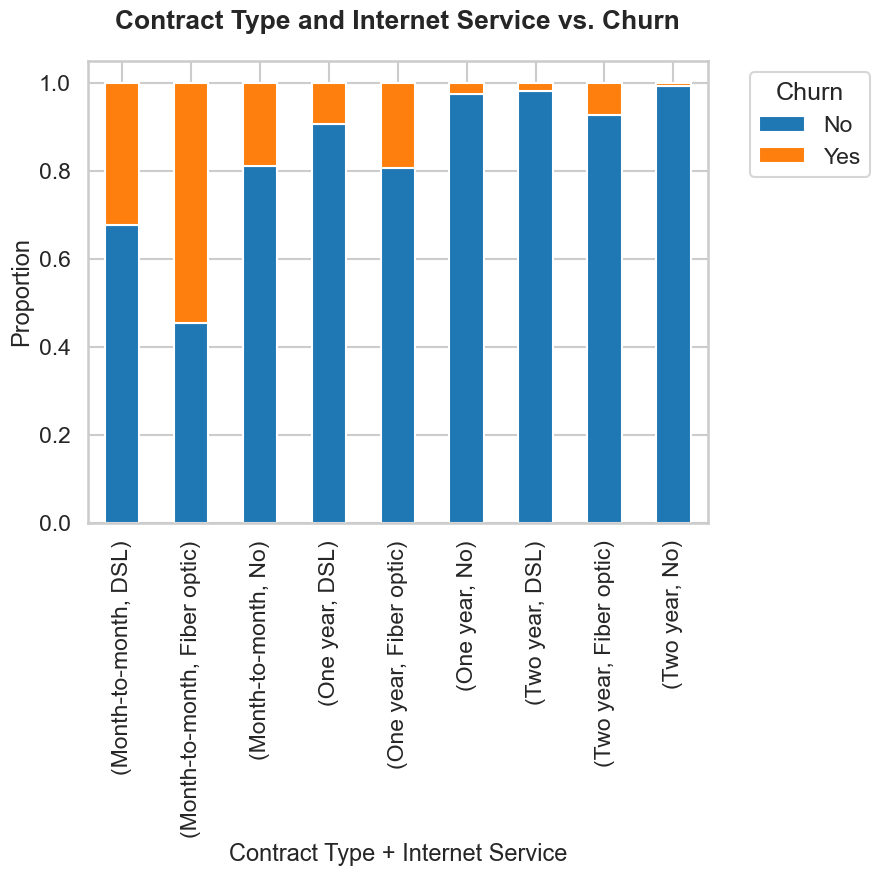

In [135]:
## Multivariate Analysis

# contract + internet service vs churn
ci = pd.crosstab(index=[df['Contract'], df['InternetService']], columns=df['Churn'], normalize='index')
ci.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title("Contract Type and Internet Service vs. Churn", fontweight='bold')
plt.xlabel("Contract Type + Internet Service")
plt.ylabel("Proportion")
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Customers with month-to-month contracts and fiber optic internet have the highest churn rate.
On the other hand, customers with two-year contracts and either DSL or no internet service churn the least.
This makes sense, as longer contracts and simpler services lead to customer loyalty, while high-cost, short-term plans result in more churn.

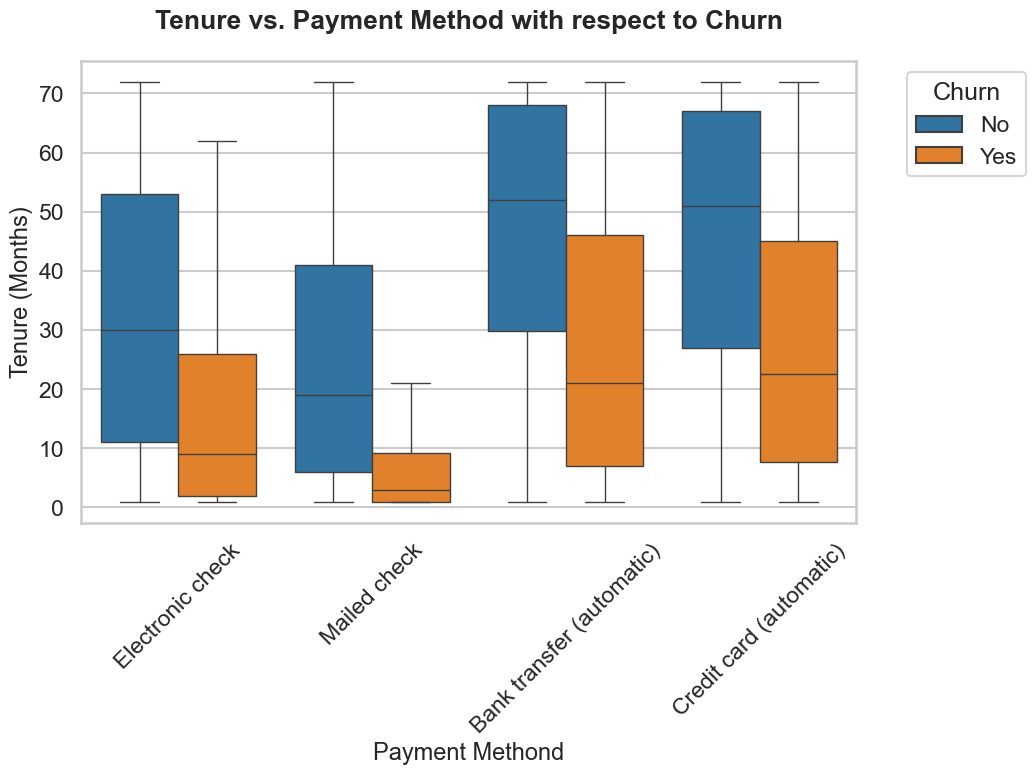

In [137]:
# tenure + payment method vs churn
plt.figure(figsize=(10,6))
sns.boxplot(df, x='PaymentMethod', y='tenure', hue='Churn', showfliers=False)
plt.title('Tenure vs. Payment Method with respect to Churn', fontweight='bold')
plt.xlabel('Payment Methond')
plt.ylabel('Tenure (Months)')
plt.xticks(rotation=45)
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Customers using electronic checks have higher churn rates and generally lower tenure.
People paying with mailed checks also leave earlier, but it’s not as extreme.
Automatic payments (bank transfer or credit card) are clearly associated with longer customer retention.
Longer tenure usually means more loyalty, and automatic payment methods seem to encourage that.

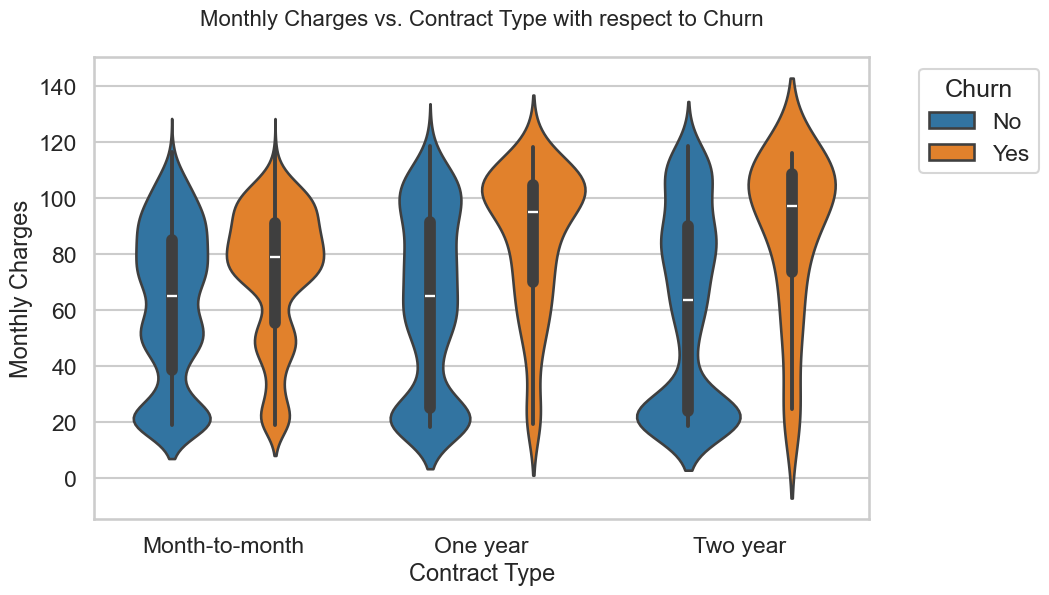

In [139]:
# monthly charges + contract vs. churn
plt.figure(figsize=(10,6))
sns.violinplot(df, x='Contract', y='MonthlyCharges', hue="Churn")
plt.title('Monthly Charges vs. Contract Type with respect to Churn', fontsize=16)
plt.xlabel("Contract Type")
plt.ylabel("Monthly Charges")
plt.legend(title= "Churn", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Churn is highest among month-to-month contract holders, especially those with higher monthly charges.
One-year and two-year contract customers have much lower churn, and their charges seem more balanced.
Customers locked into long-term contracts are clearly more stable and less likely to leave.
Overall, flexibility in contracts seems to lead to higher churn.

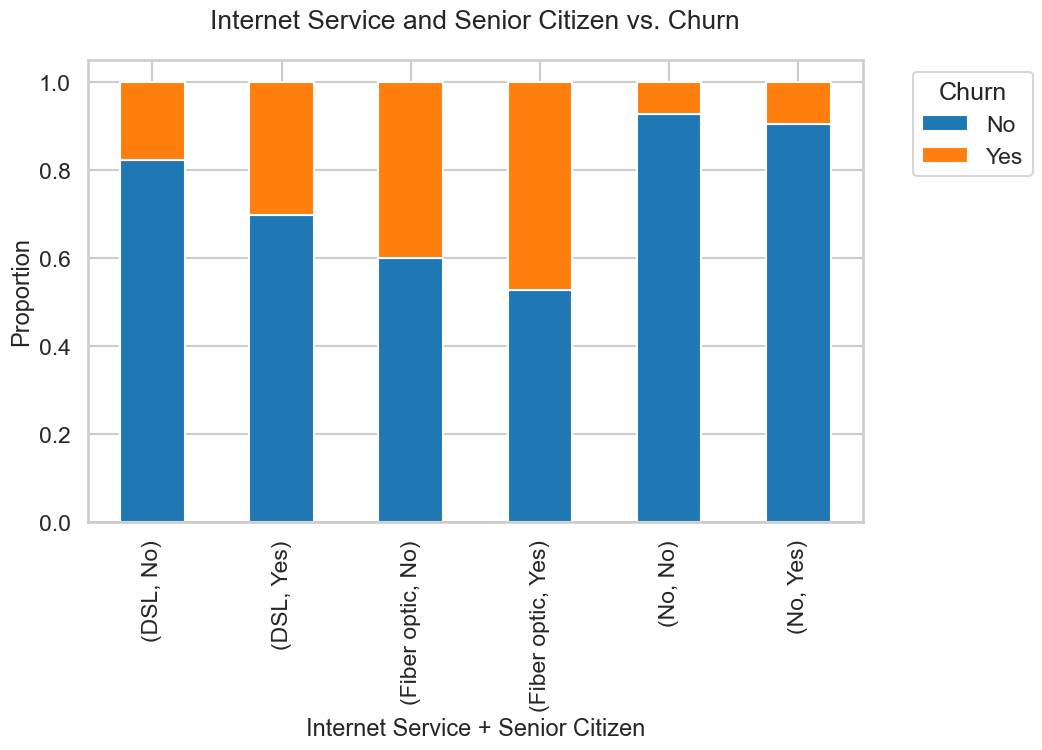

In [141]:
# Internet Service + Senior Citizen vs Churn
its = pd.crosstab(index=[df['InternetService'], df["SeniorCitizen"]], columns=df['Churn'], normalize='index')
its.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Internet Service and Senior Citizen vs. Churn")
plt.xlabel('Internet Service + Senior Citizen')
plt.ylabel("Proportion")
plt.legend(title="Churn", bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

Senior citizens with fiber optic internet show the highest churn rate.
Even non-senior fiber optic users have a higher churn rate compared to those using DSL.
DSL users appear to be more loyal and stable.
Customers without internet service almost never churn, probably because they use fewer services and have fewer frustrations.
Fiber optic + older customers = biggest churn risk zone.

Key Observations:
More churn seen in:

Fiber optic users
Electronic check payments
High monthly charges and paperless billing
Less churn seen in:

Long-term customers (5+ years)
Two-year contracts
Customers with tech support, security, and backup services
Auto credit card payments
No real impact from:

Gender, phone service, and multiple lines

In [239]:
temp = df.copy()
temp['Churn'] = np.where(temp.Churn == 'Yes', 1, 0)
temp = temp.drop('tenure', axis=1)

<Figure size 1200x1200 with 0 Axes>

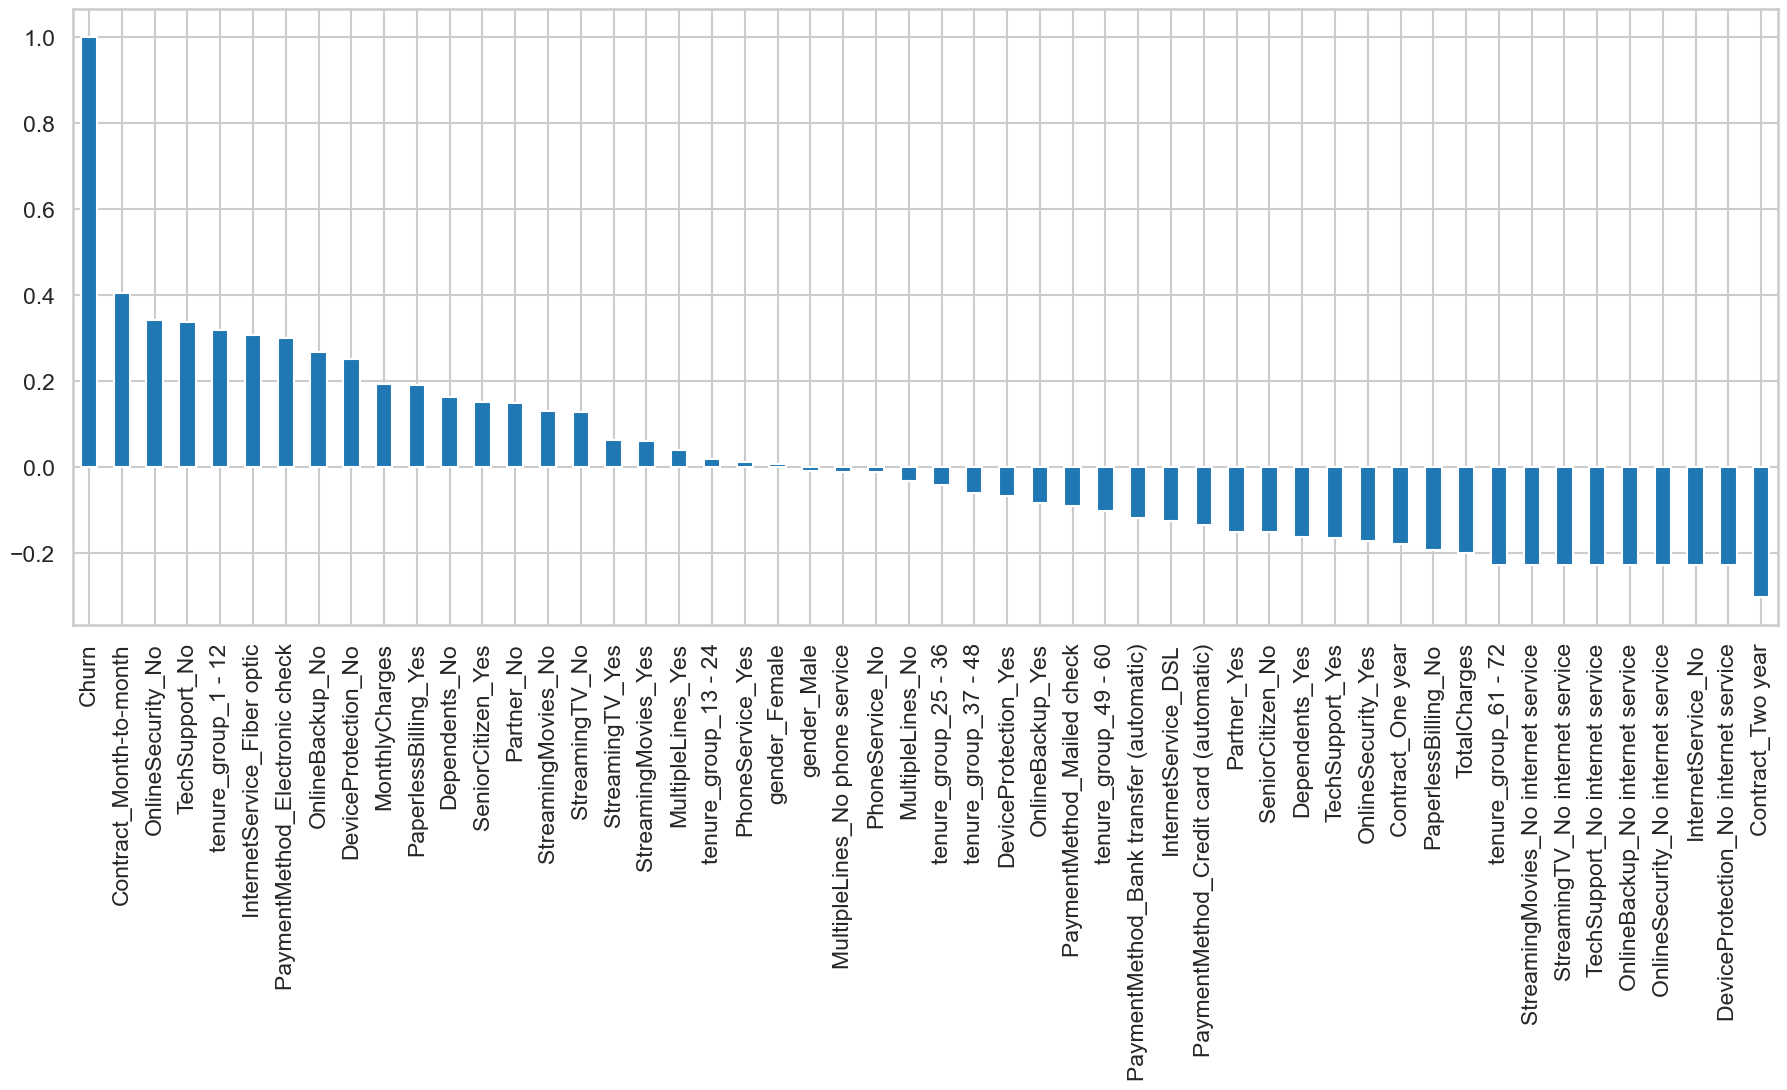

In [241]:
plt.figure(figsize=(22, 8))
temp1 = pd.get_dummies(temp, dtype=np.int32)
temp1.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')
plt.show()

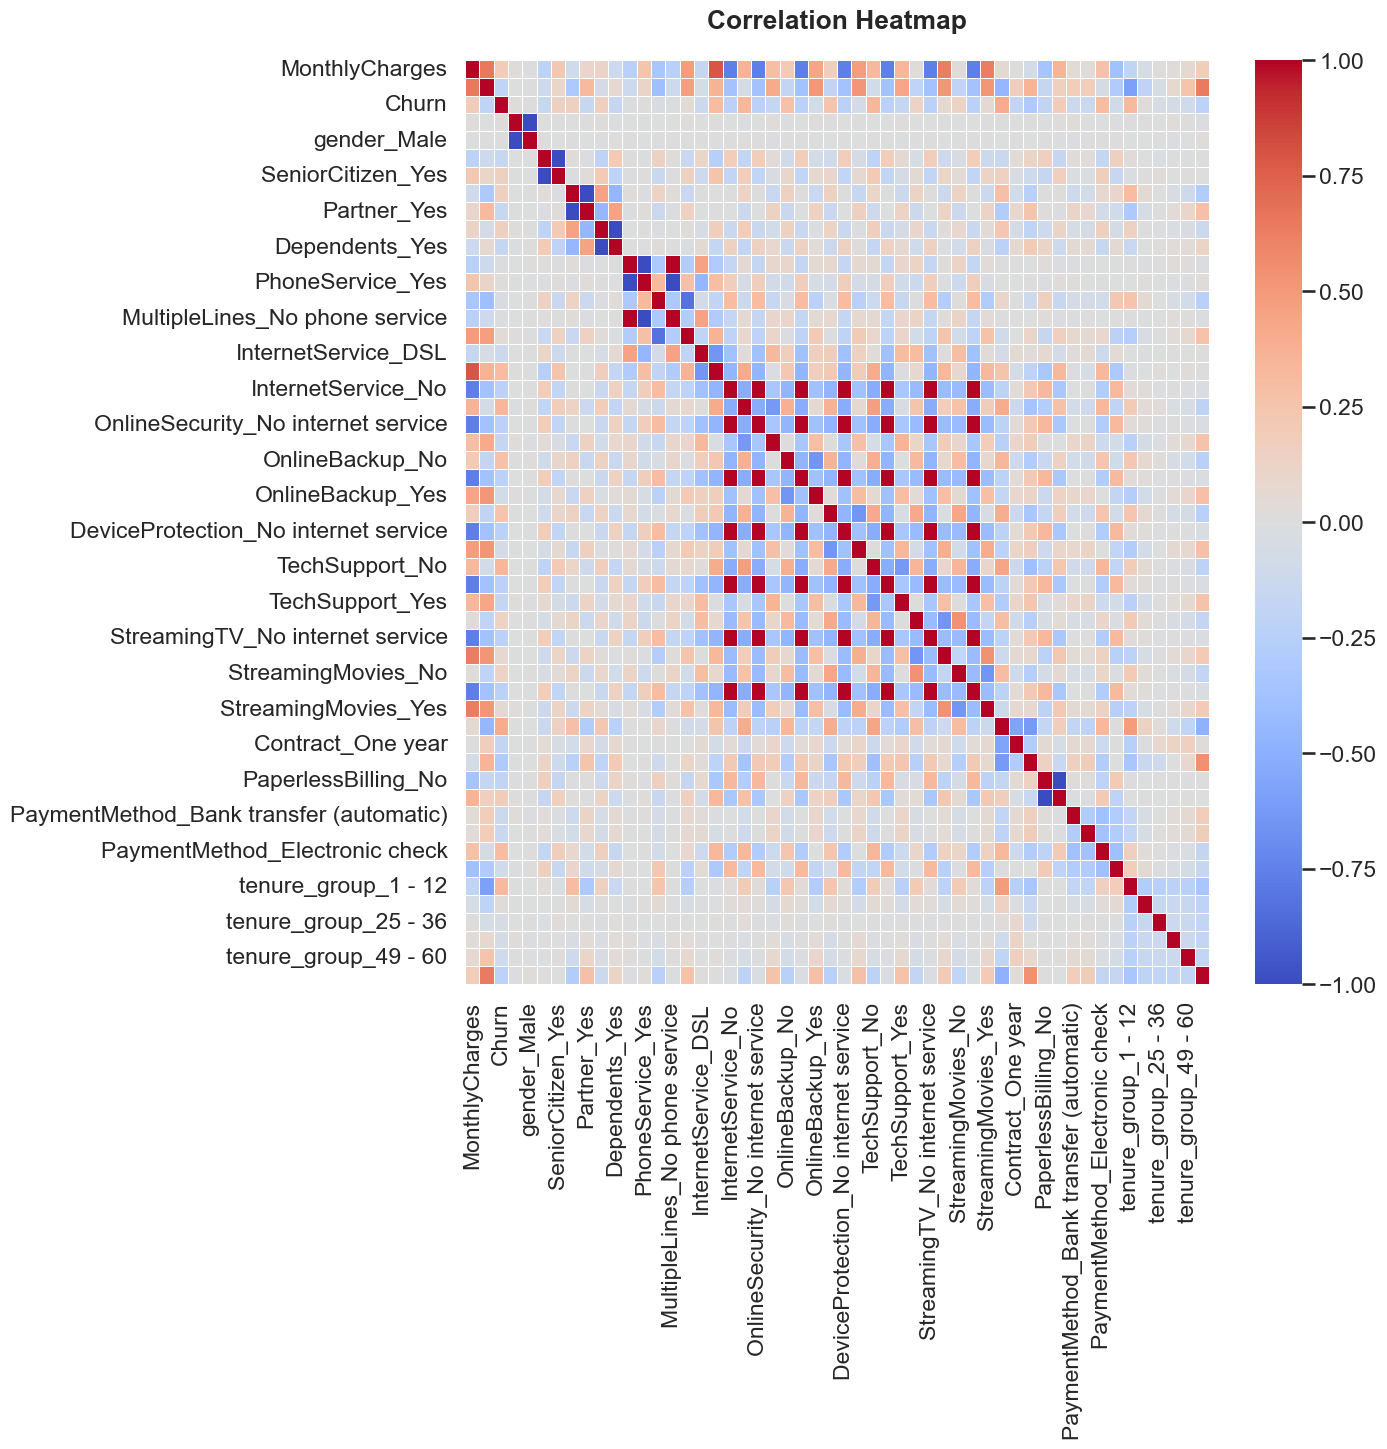

In [243]:
plt.figure(figsize=(12,12))
sns.heatmap(temp1.corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap", fontweight='bold')
plt.show()

In [144]:
## Machine learning

In [145]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pickle

In [152]:
data=df.copy()

In [153]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


In [154]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

In [155]:
## feature engineering


# encode target variable
data['Churn'] = data['Churn'].map({'Yes':1, "No":0})

In [156]:
# label encoding for binary columns
binary_cols = ['gender', 'SeniorCitizen', 'Dependents', 'Partner', 'PhoneService', 'PaperlessBilling']
le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

In [157]:
# encoding remaining multiclass features using one hot encoding
multiclass_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod', 'tenure_group']

data = pd.get_dummies(data, columns=multiclass_cols, drop_first=True, dtype=np.int32)

In [212]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,1,0,1,0,1,29.85,29.85,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,1,0,0,0
2,1,0,0,0,2,1,1,53.85,108.15,1,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,2,1,1,70.70,151.65,1,...,0,0,0,1,0,0,0,0,0,0


In [214]:
# feature and target selection
X = data.drop('Churn', axis=1)
y = data['Churn']

In [216]:
from collections import Counter
Counter(y)

Counter({0: 5163, 1: 1869})

In [ ]:
####Dataset is unbalanced, so we need to make it balanced

In [218]:
## handling imbalanced data


from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=0)
X_resampled, y_resampled = sm.fit_resample(X,y)

C:\Users\pc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\pc\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\pc\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable

In [220]:
Counter(y_resampled)

Counter({1: 3147, 0: 2629})

In [ ]:
##Model Building

In [222]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2 ,random_state=0)

In [226]:
# model training
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [ ]:
## Model Evaluation

In [228]:
# model evaluation
y_pred = rf_clf.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nAccuracy:", accuracy_score(y_test, y_pred))


Confusion Matrix:
 [[496  32]
 [ 22 606]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       528
           1       0.95      0.96      0.96       628

    accuracy                           0.95      1156
   macro avg       0.95      0.95      0.95      1156
weighted avg       0.95      0.95      0.95      1156


Accuracy: 0.9532871972318339


In [ ]:
## conclusion

In this project, we conducted an in-depth Exploratory Data Analysis (EDA) on the Telco Customer Churn dataset
and built a predictive model to identify customers likely to churn.

In [ ]:
## key take away

#We explored key factors influencing churn, including contract type, tenure, monthly charges, and internet service.
#Visualizations and correlation analysis helped us gain valuable insights into customer behavior and churn drivers.
#A Random Forest Classifier was used to build the predictive model, achieving an impressive accuracy of 94.6%.
#This indicates the model's strong ability to distinguish between customers who are likely to stay and those likely to leave.
    